<div class="alert alert-info" >
    <center><h1><font>Machine Learning Final Project</font></h1></center><br>
    <center>2022/2023</center>
</div>

**Table of Contents** <br>
* [1. Data Exploration](#dataexploration)
    * [1.1 Imports](#imports)
    * [1.2 Data Integration](#dataintegration)
    * [1.3 Initial Analysis](#initialanalysis)
        * [1.3.1 Duplicate Records](#duplicaterecords)
        * [1.3.2 Undesireable Characters](#undesireablecharacters)
        * [1.3.3 Missing Values](#missingvalues)
        * [1.3.4 Data Statistics](#datastatistics)
    * [1.4 Visual Analysis](#visualanalysis)
        * [1.4.1 Categorical Variables Exploration](#categoricalvariablesexploration)
        * [1.4.2 Numerical Variables Exploration](#numericalvariablesexploration)
* [2. Data Preparation and Preprocessing](#datapreprocessing)
    *  [2.1 Coherence Checking](#coherence)
    *  [2.2 Feature Engineering](#featureengineering)
    *  [2.3 Treating Missing Values](#treatingmissingvalues)
    *  [2.4 Outlier Analysis](#outlieranalysis)
        * [2.4.1 Inter Quartile Range](#iqr)
        * [2.4.2 Local Outlier Factor](#lof)
        * [2.4.3 Z-score](#z-score)
    *  [2.5 Encoding and Split](#encodingandsplit)
    *  [2.6 Scaling](#scaling)
    *  [2.7 Feature Selection](#featureselection)
        *  [2.7.1 Spearman Correlation](#spearman)
        *  [2.7.2 Univariate Variables](#univariate)
        *  [2.7.3 Logistic Regression](#logisticregressionfeature)
        *  [2.7.4 Random Forest](#randomforest)
        *  [2.7.5 RFE](#rfe)
        *  [2.7.6 Dispertion Ratio](#dispertionratio)
        *  [2.7.7 Mean Absolute Diference (MAD)](#mad)
        *  [2.7.8 Feature Selection Results](#results)
* [3. Modelling](#modelling)
    *  [3.1 Logistic Regression](#logistic)
    *  [3.2 Gaussian Naive Bayes](#gaussiannb)
    *  [3.3 KNN](#knn)
    *  [3.4 Decision Trees](#dt)
    *  [3.5 Support Vector Machine](#supportvectormachine)
        *  [3.5.1 Support Vector Classification](#svc)
        *  [3.5.2 Nu-Support Vector Classification](#nusvc)
        *  [3.5.3 Linear Support Vector Classification](#linearsvc)
    *  [3.6 Neural Networks](#nn)
    *  [3.7 Ensemble Methods](#ensemble)
        *  [3.7.1 Bagging Classifier](#bagging)
        *  [3.7.2 Random Forest](#rforest)
        *  [3.7.3 Extra Trees](#et)
        *  [3.7.4 Ada Boost](#ada)
        *  [3.7.5 Gradient Boosting](#gradient)
    *  [4. Assessment](#assessment)
    *  [5. Deployment](#deployment)
        *  [5.1 Repeating Steps on Test Data](#rep)

# 1. Data Exploration <a class="anchor" id="dataexploration"></a>

## 1.1 Imports <a class="anchor" id="imports"></a>

In [30]:
import pandas as pd 
import numpy as np

# data partition
from sklearn.model_selection import train_test_split

# data transformation
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

# feature selection

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.svm import SVC

# models
from sklearn.model_selection import GridSearchCV #for hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter optimization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import ceil
import graphviz
import pydotplus
import textwrap

# assessment
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

## 1.2 Data Integration <a class="anchor" id="dataintegration"></a>

First, we import the datasets into variables.

In [2]:
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

In [3]:
train_demo.head()

,PatientID,Name,Birth_Year,Region,Education,Disease
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1


In [4]:
train_habits.head()

,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
2,1557,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
3,1658,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
4,1544,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


In [5]:
train_health.head()

,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...


Merging all the datasets into a unique one based on the PatientID variable.

In [6]:
train_patient_original = pd.merge(pd.merge(train_demo, train_health, on="PatientID"), train_habits, on='PatientID')

In [7]:
train_patient = train_patient_original.copy()

Defining the PatientID as the index of our dataframe.

In [8]:
train_patient.set_index('PatientID', inplace = True)
train_patient.head()

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


## 1.3 Initial Analysis <a class="anchor" id="initialanalysis"></a>

In [9]:
# --- Print Dataset Info ---
print('\033[36m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[36m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[36m\033[1m', train_patient.shape[0])
print('\033[0m'+'Total Columns:'+'\033[36m\033[1m', train_patient.shape[1])
print('\033[0m\033[36m*' * 20)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[36m*' * 22 +'\033[0m')
train_patient.info(memory_usage = False)

.: Dataset Info :.
********************
Total Rows: 800
Total Columns: 18
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Height            800 non-null    int64 
 6   Weight            800 non-null    int64 
 7   High_Cholesterol  800 non-null    int64 
 8   Blood_Pressure    800 non-null    int64 
 9   Mental_Health     800 non-null    int64 
 10  Physical_Health   800 non-null    int64 
 11  Checkup           800 non-null    object
 12  Diabetes          800 non-null    object
 13  Smoking_Habit     800 non-null    object
 14  Drinking

### 1.3.1 Duplicate records <a class="anchor" id="duplicaterecords"></a>

Checking if there are any duplicates in our dataframe.

In [10]:
print('\033[36m\033[1m'+'.: Duplicated Values :.')
print('\033[0m\033[36m*' * 23)
print('\033[0m', train_patient.duplicated().value_counts())

.: Duplicated Values :.
***********************
 False    800
dtype: int64


### 1.3.2 Undesireable characters <a class="anchor" id="undesireablecharacters"></a>

In [11]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = train_patient.replace(undesireable_char,np.nan, inplace=True)
print('\033[36m\033[1m'+'.: Undesirable Characters :.')
print('\033[0m\033[36m*' * 28)
print('\033[0m', a)

.: Undesirable Characters :.
****************************
 None


### 1.3.3 Missing values <a class="anchor" id="missingvalues"></a>

In [12]:
total = train_patient.isnull().sum().sort_values(ascending=False)
percent = (train_patient.isnull().sum()/train_patient.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('\033[36m\033[1m'+'.: Null Values :.')
print('\033[0m\033[36m*' * 17)
print('\033[0m', missing_data)

.: Null Values :.
*****************
                   Total  Percent
Education            13  0.01625
Name                  0  0.00000
Physical_Health       0  0.00000
Fruit_Habit           0  0.00000
Exercise              0  0.00000
Drinking_Habit        0  0.00000
Smoking_Habit         0  0.00000
Diabetes              0  0.00000
Checkup               0  0.00000
Mental_Health         0  0.00000
Birth_Year            0  0.00000
Blood_Pressure        0  0.00000
High_Cholesterol      0  0.00000
Weight                0  0.00000
Height                0  0.00000
Disease               0  0.00000
Region                0  0.00000
Water_Habit           0  0.00000


Looking for null values in the dataframe. We concluded that Education contains 13 null values.

### 1.3.4 Data Statistics <a class="anchor" id="datastatistics"></a>

In [13]:
train_patient_num = train_patient.select_dtypes(exclude=object)
train_patient_cat = train_patient.select_dtypes(include=object)

In [14]:
train_patient_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


In [15]:
train_patient_cat.describe().T

,count,unique,top,freq
Name,800,799,Mr. Gary Miller,2
Region,800,10,East Midlands,154
Education,787,6,University Complete (3 or more years),239
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364


In [16]:
train_patient[train_patient["Disease"] == 0].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,389,388,Mr. Gary Miller,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth_Year,389.0,NaN,NaN,NaN,1963.524422,16.521543,1859.0,1960.0,1964.0,1970.0,1987.0
Region,389,10,East Midlands,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,384,6,University Complete (3 or more years),116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disease,389.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Height,389.0,NaN,NaN,NaN,169.205656,7.339265,151.0,165.0,171.0,174.0,180.0
Weight,389.0,NaN,NaN,NaN,65.647815,11.688477,40.0,56.0,64.0,73.0,97.0
High_Cholesterol,389.0,NaN,NaN,NaN,253.313625,47.96739,135.0,220.0,252.0,287.0,413.0
Blood_Pressure,389.0,NaN,NaN,NaN,133.974293,18.546941,100.0,120.0,130.0,144.0,200.0
Mental_Health,389.0,NaN,NaN,NaN,15.033419,5.301859,0.0,12.0,16.0,19.0,28.0


In [17]:
train_patient[train_patient["Disease"] == 1].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,411,411,Mrs. Stephanie Gay,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth_Year,411.0,NaN,NaN,NaN,1968.428224,13.908642,1855.0,1963.0,1970.0,1977.0,1993.0
Region,411,10,East Midlands,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,403,6,University Complete (3 or more years),123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disease,411.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Height,411.0,NaN,NaN,NaN,166.481752,8.331342,151.0,158.0,167.0,173.0,180.0
Weight,411.0,NaN,NaN,NaN,69.890511,12.161121,41.0,61.0,71.0,79.0,97.0
High_Cholesterol,411.0,NaN,NaN,NaN,245.545012,54.545482,130.0,211.0,238.0,272.0,568.0
Blood_Pressure,411.0,NaN,NaN,NaN,128.289538,15.013697,94.0,120.0,130.0,138.0,180.0
Mental_Health,411.0,NaN,NaN,NaN,19.532847,4.477125,5.0,17.0,20.0,23.0,29.0


In [18]:
train_patient.groupby("Disease").mean()

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
Disease,,,,,,,
0,1963.524422,169.205656,65.647815,253.313625,133.974293,15.033419,7.030848
1,1968.428224,166.481752,69.890511,245.545012,128.289538,19.532847,2.218978


## 1.4 Visual Analysis <a class="anchor" id="visualanalysis"></a>

### 1.4.1 Categorical Variables Exploration <a class="anchor" id="categoricalvariablesexploration"></a>

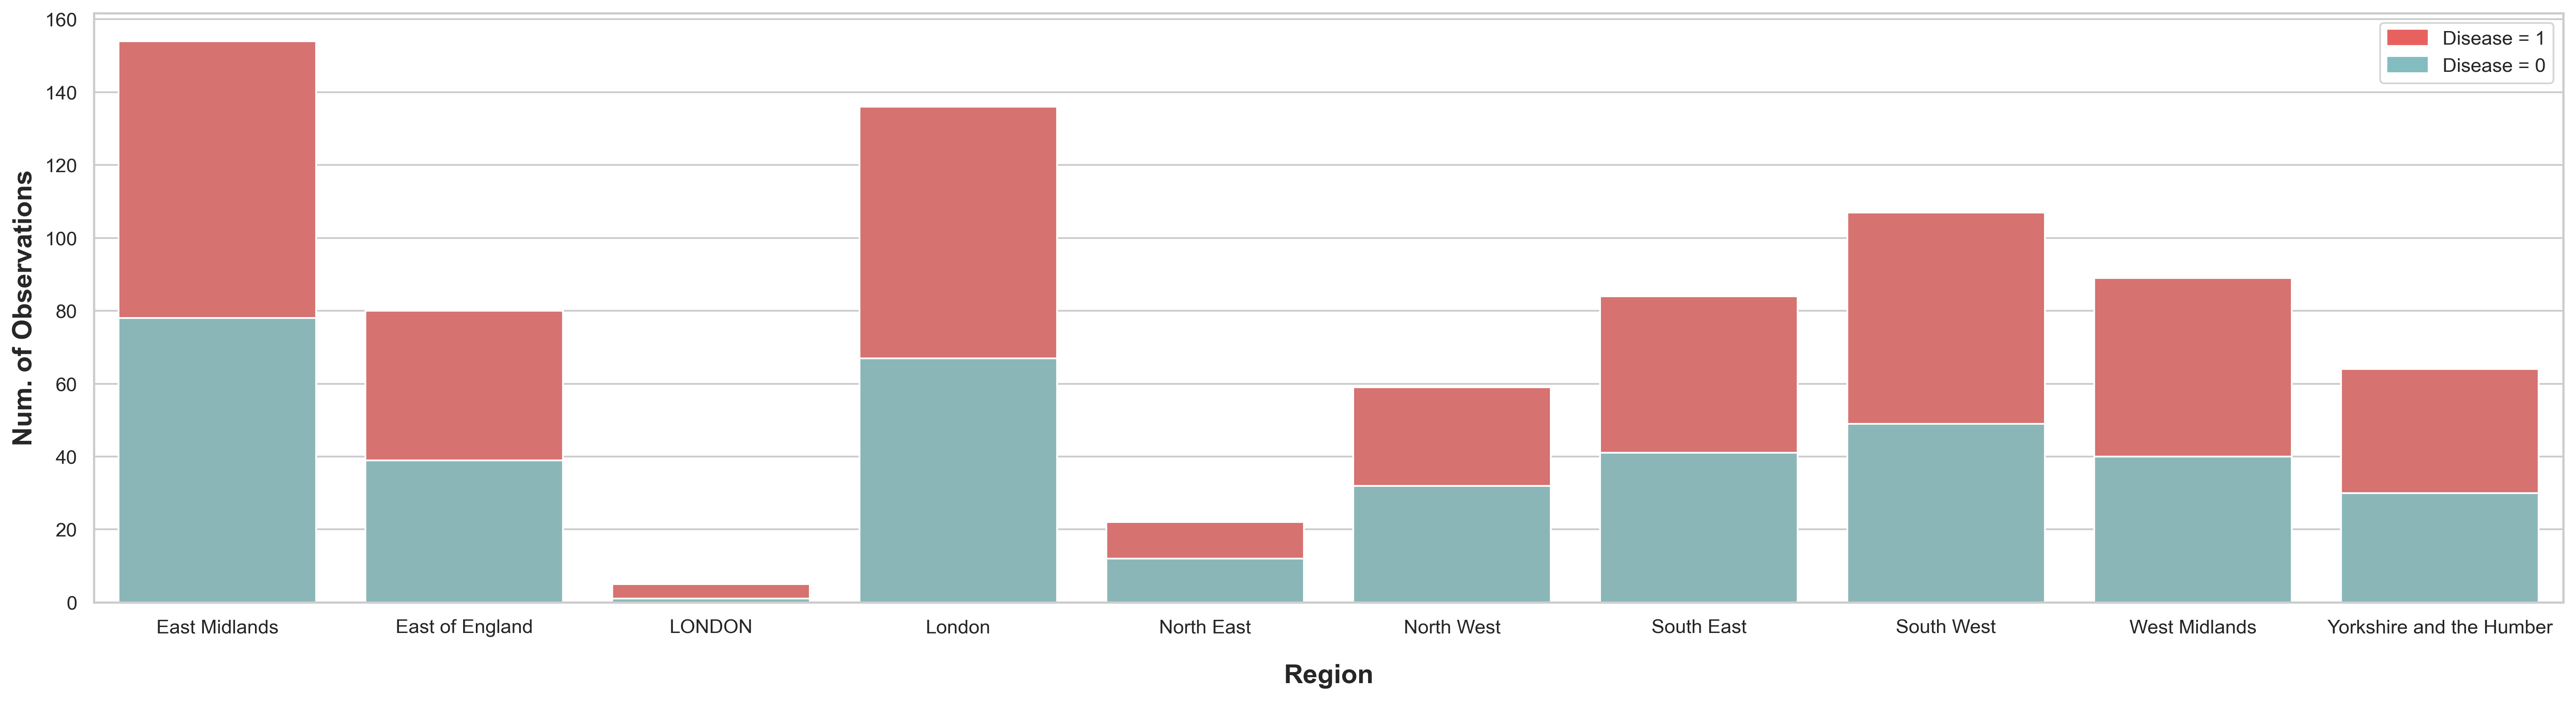

In [101]:
plt.figure(figsize=(25, 6), dpi=300)

# set plot style: grey grid in the background:
sns.set(style="whitegrid")

# Getting value count
total = train_patient.groupby('Region')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Region')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Region", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Region", y="Disease", data=non_disease, color='#83BDC0')

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Region", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Region.png', dpi=600, bbox_inches='tight')
plt.show()

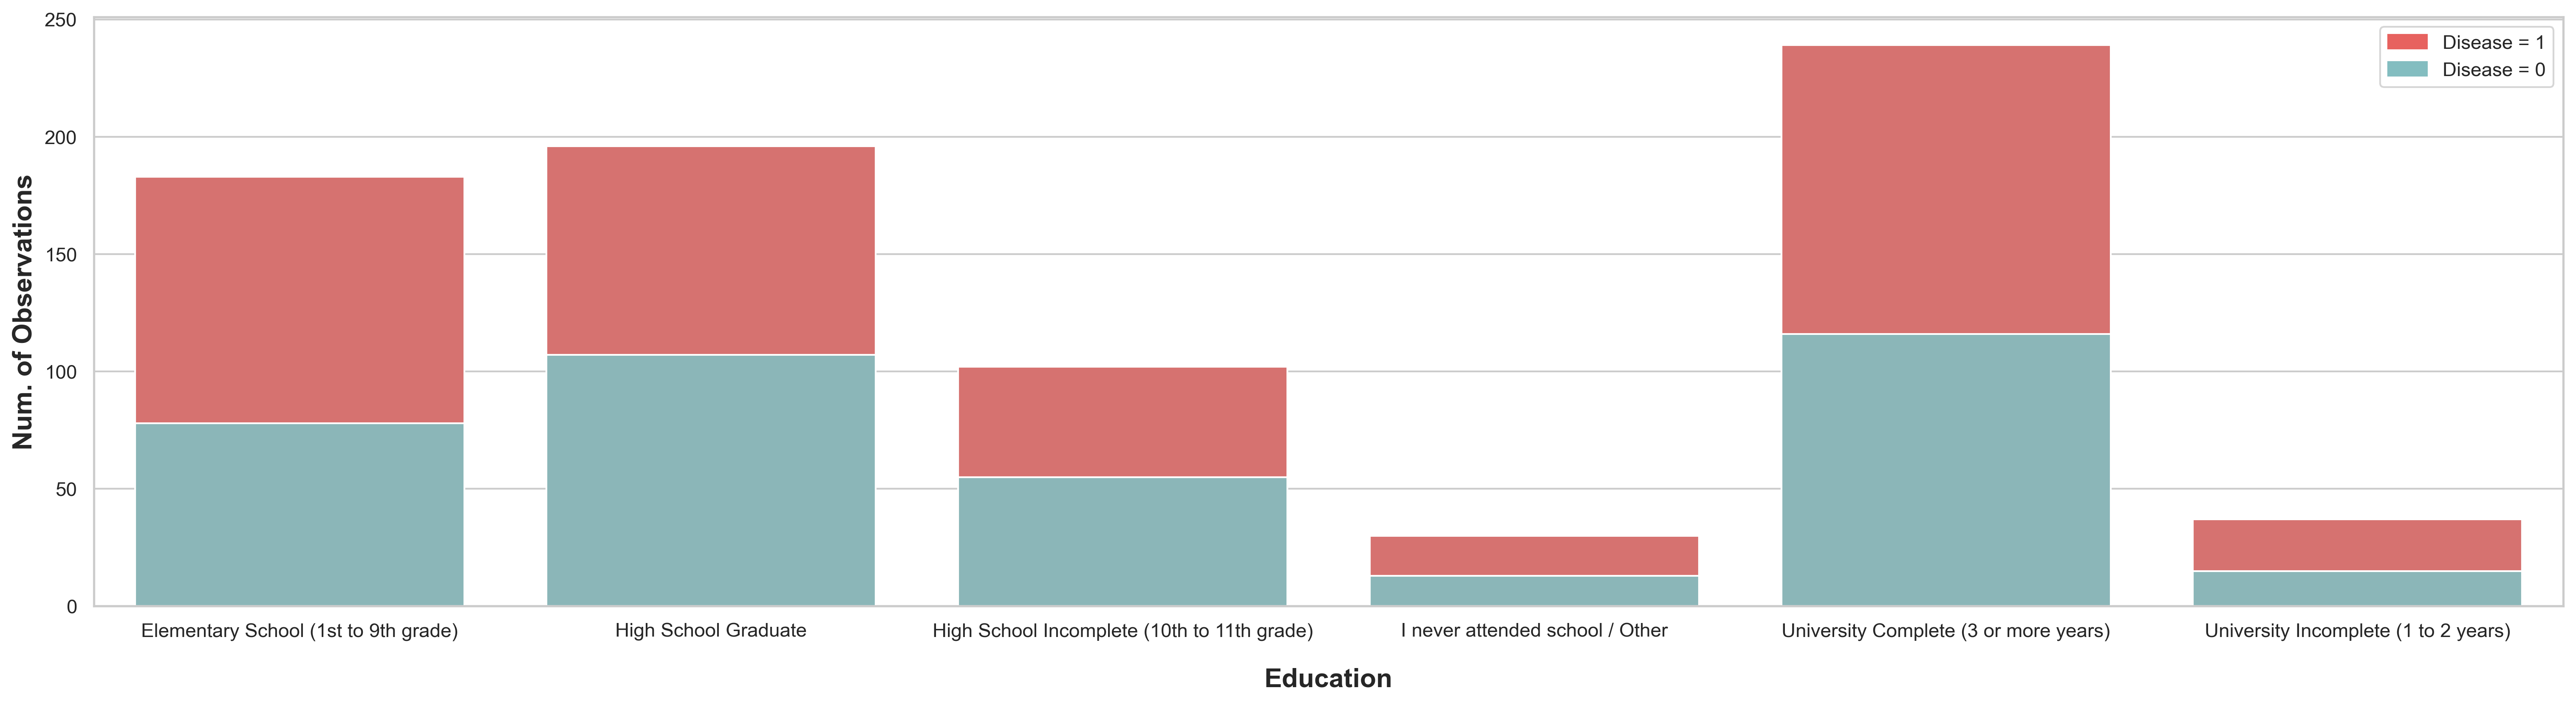

In [102]:
plt.figure(figsize=(25, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Education')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Education')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Education", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Education", y="Disease", data=non_disease, color='#83BDC0')

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Education", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Education.png', dpi=600, bbox_inches='tight')
plt.show()

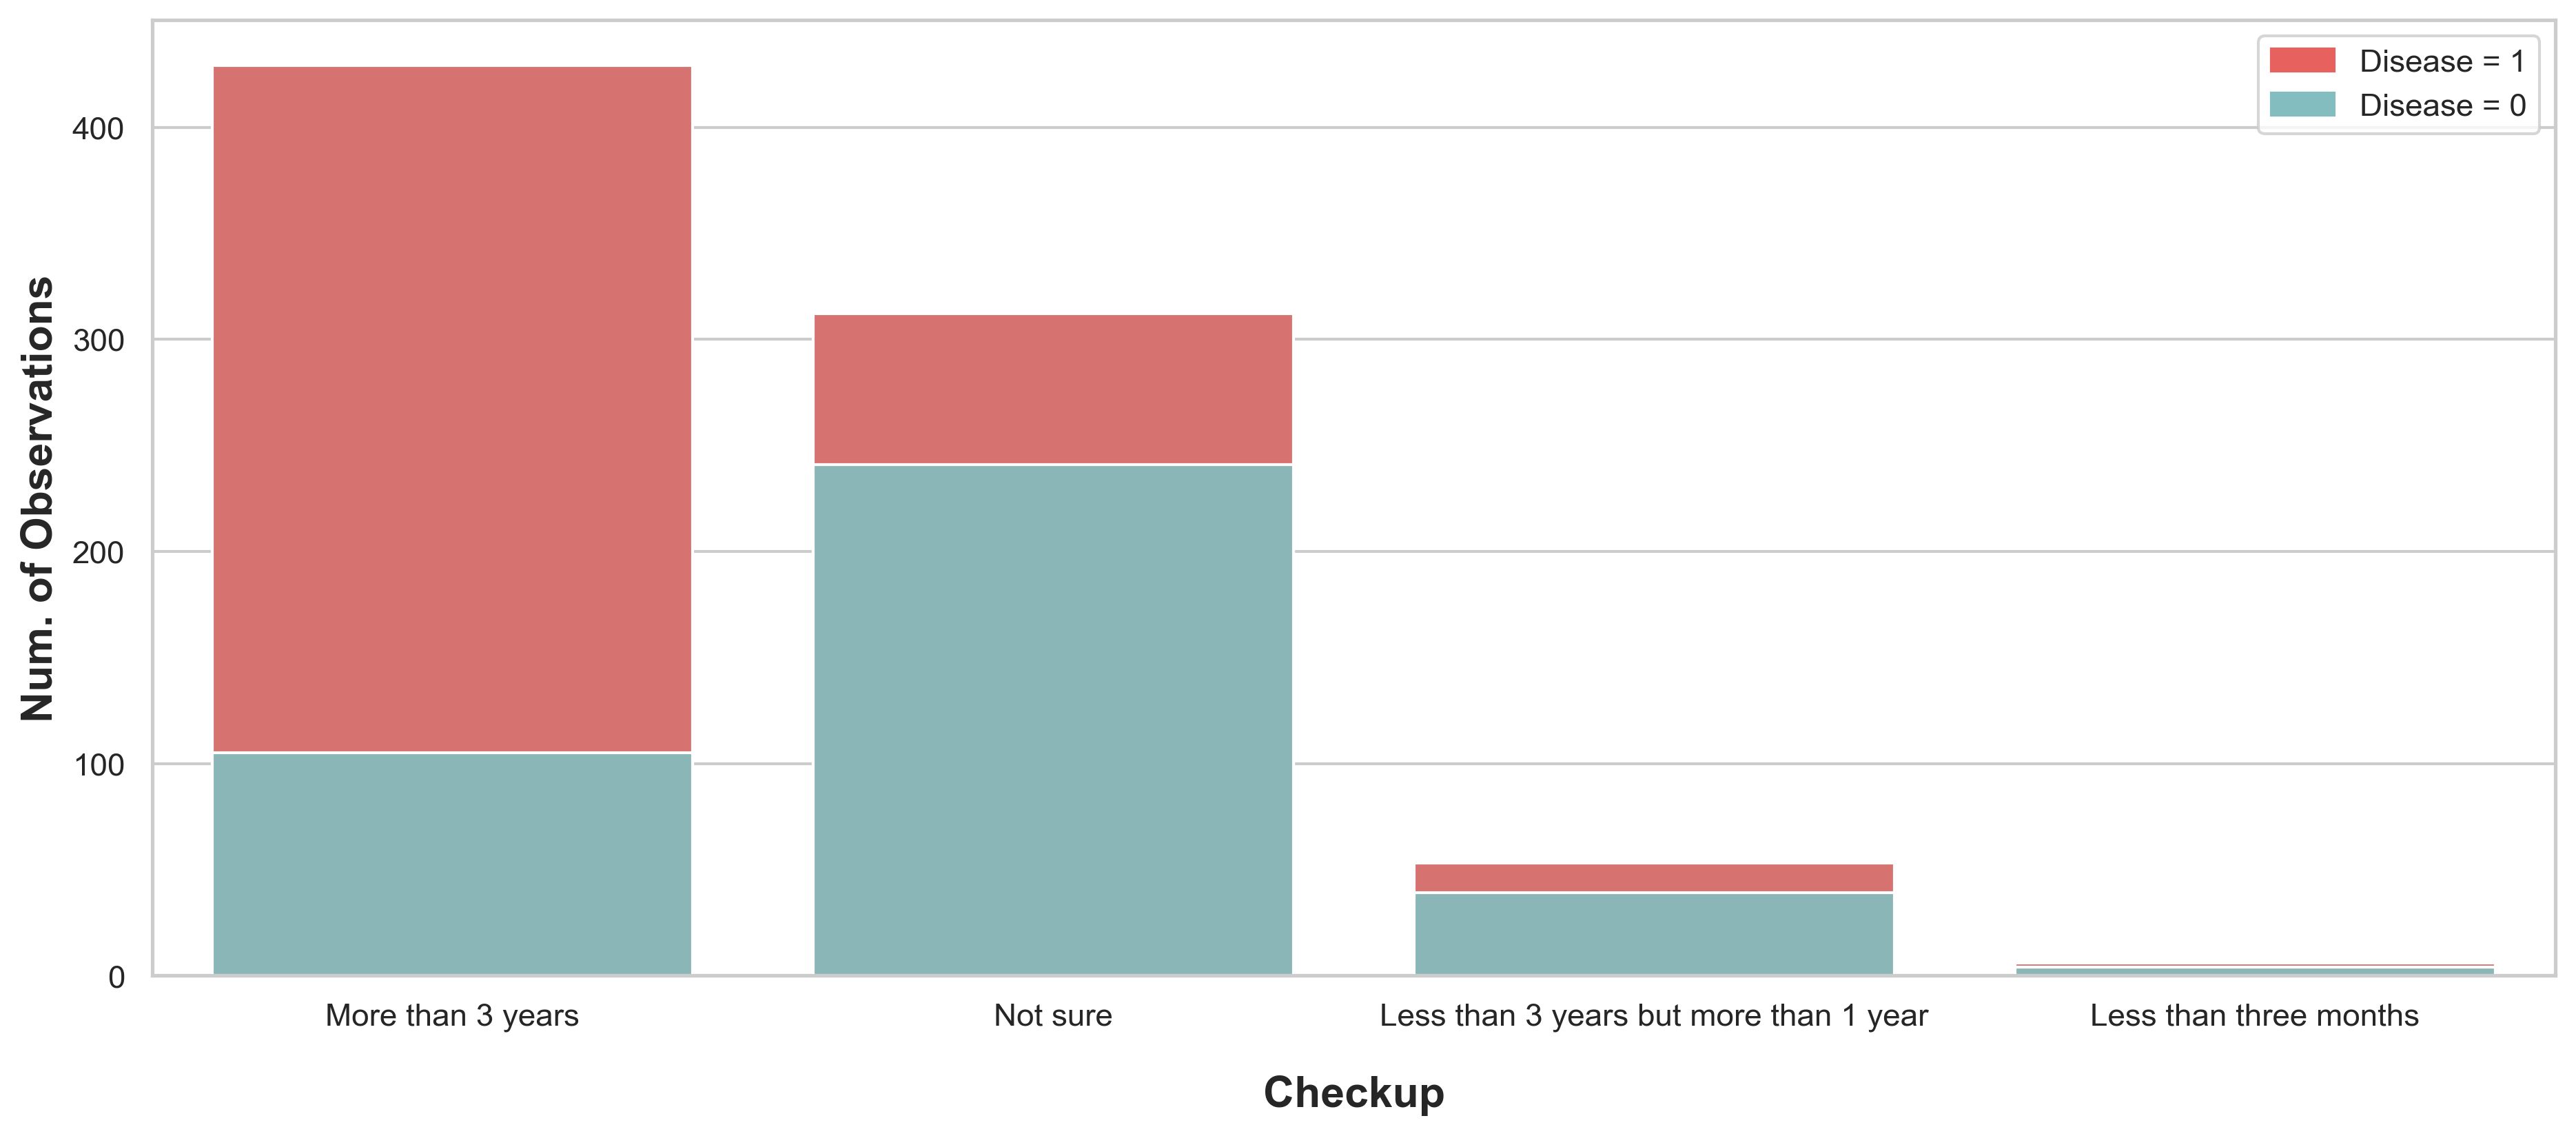

In [103]:
plt.figure(figsize=(15, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Checkup')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Checkup')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Checkup", y="Disease", data=total, color='#E7625F', order=list(train_patient['Checkup'].unique()))

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Checkup", y="Disease", data=non_disease, color='#83BDC0', order=list(train_patient['Checkup'].unique()))

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Checkup", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Checkup.png', dpi=600, bbox_inches='tight')
plt.show()

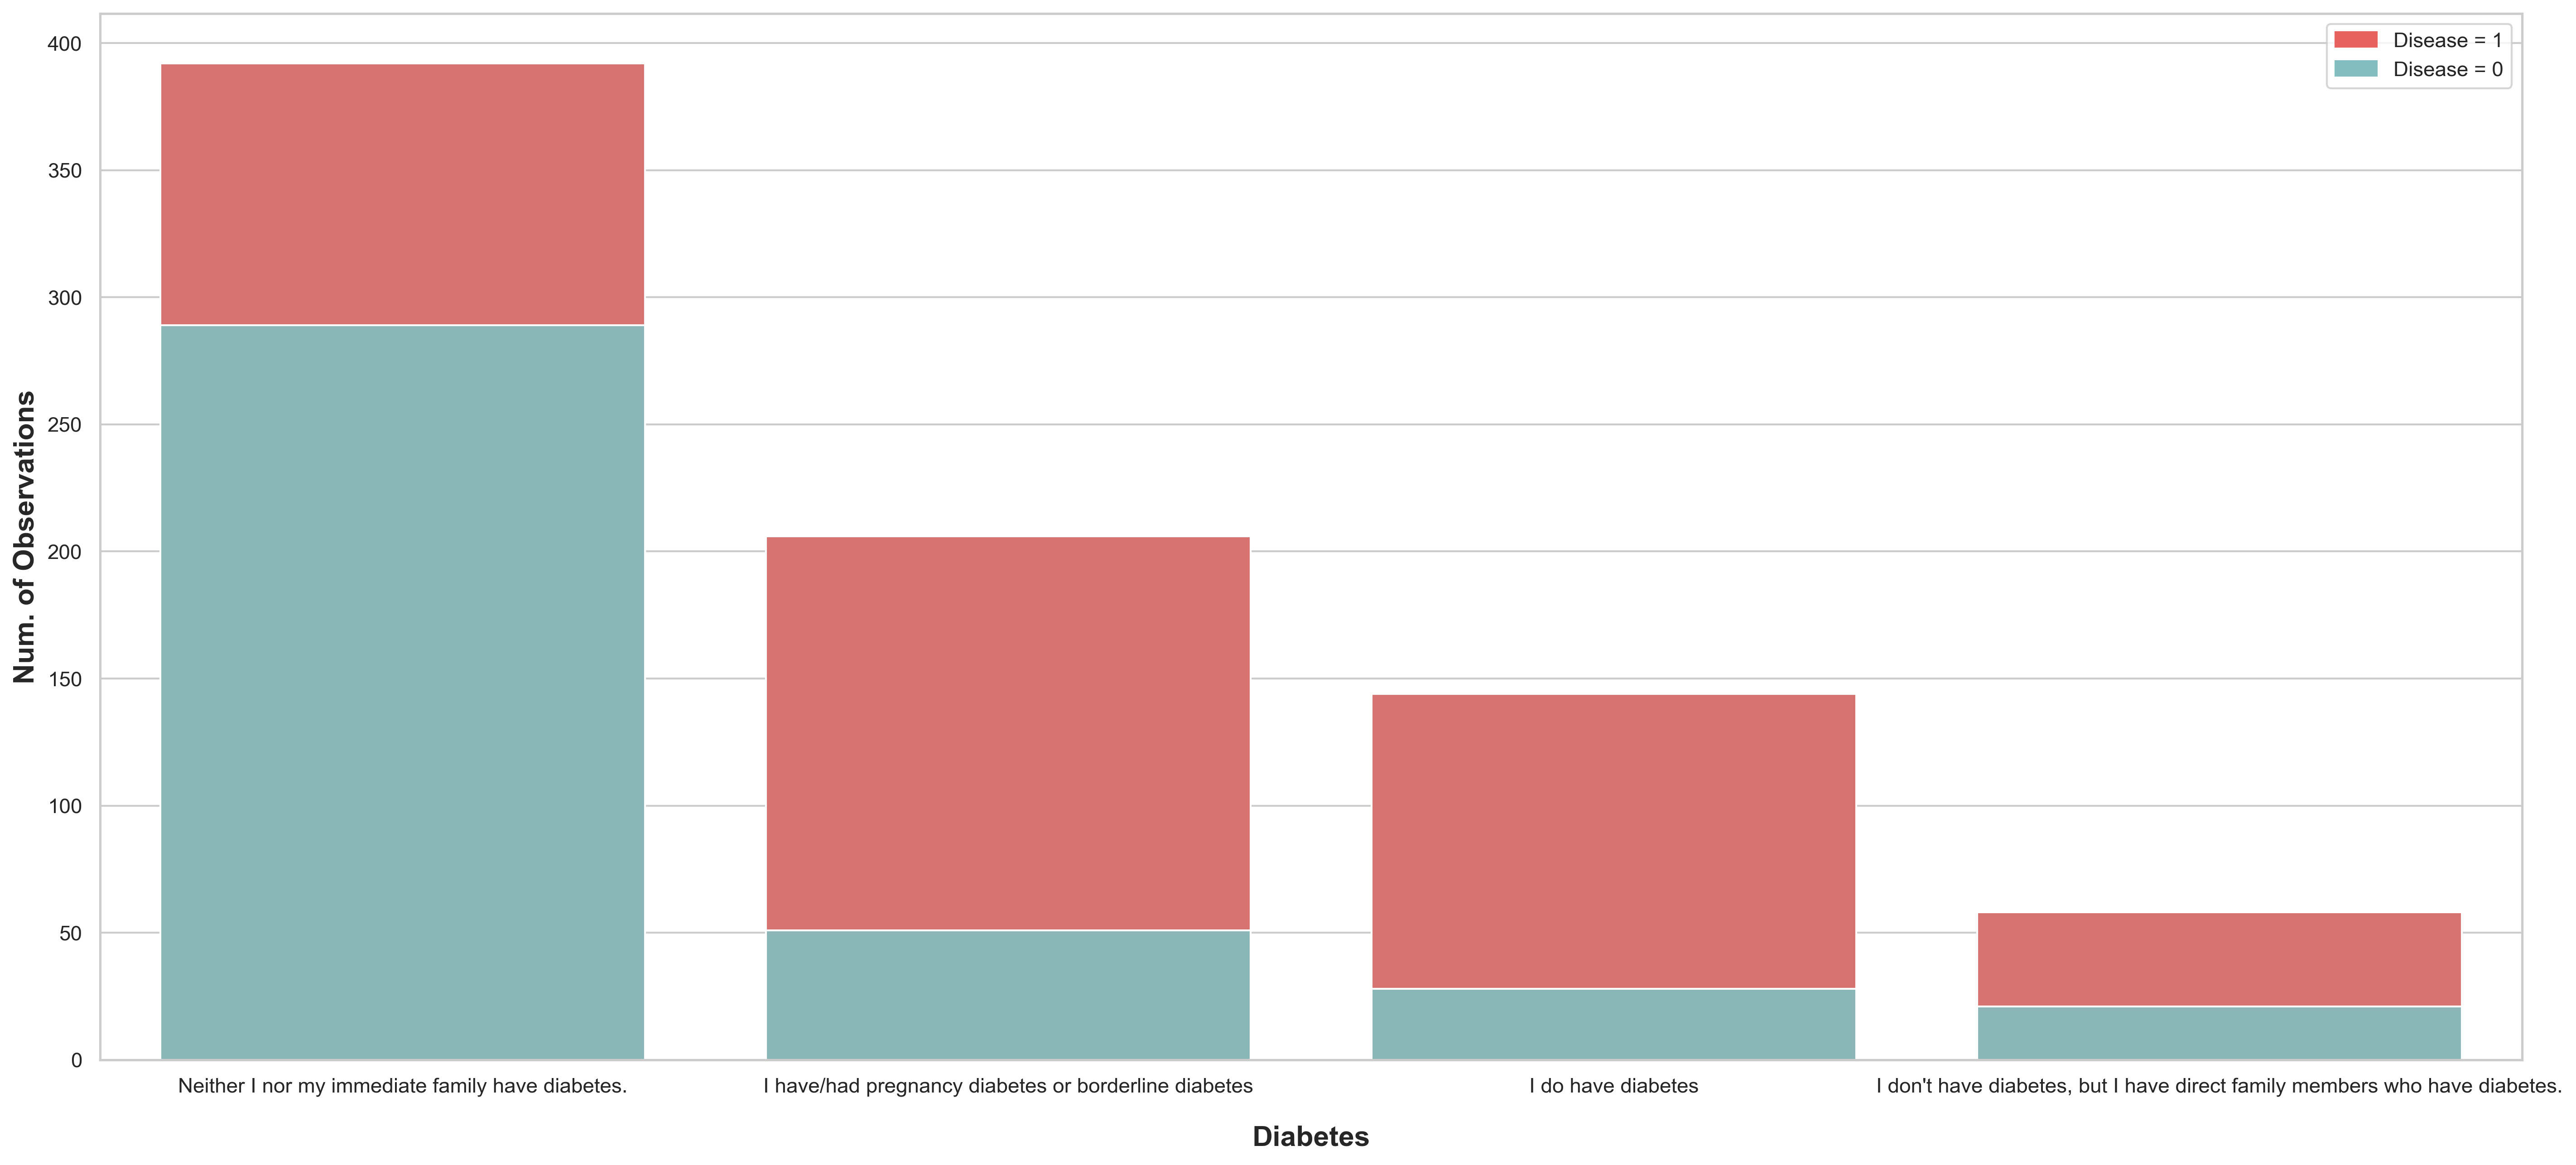

In [111]:
plt.figure(figsize=(23, 10), dpi=300)

order = list(train_patient['Diabetes'].unique())

# Getting value count
total = train_patient.groupby('Diabetes')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Diabetes')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Diabetes", y="Disease", data=total, color='#E7625F', order=order)

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Diabetes", y="Disease", data=non_disease, color='#83BDC0', order=order)

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Diabetes", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Diabetes.png', dpi=600, bbox_inches='tight')
plt.show()

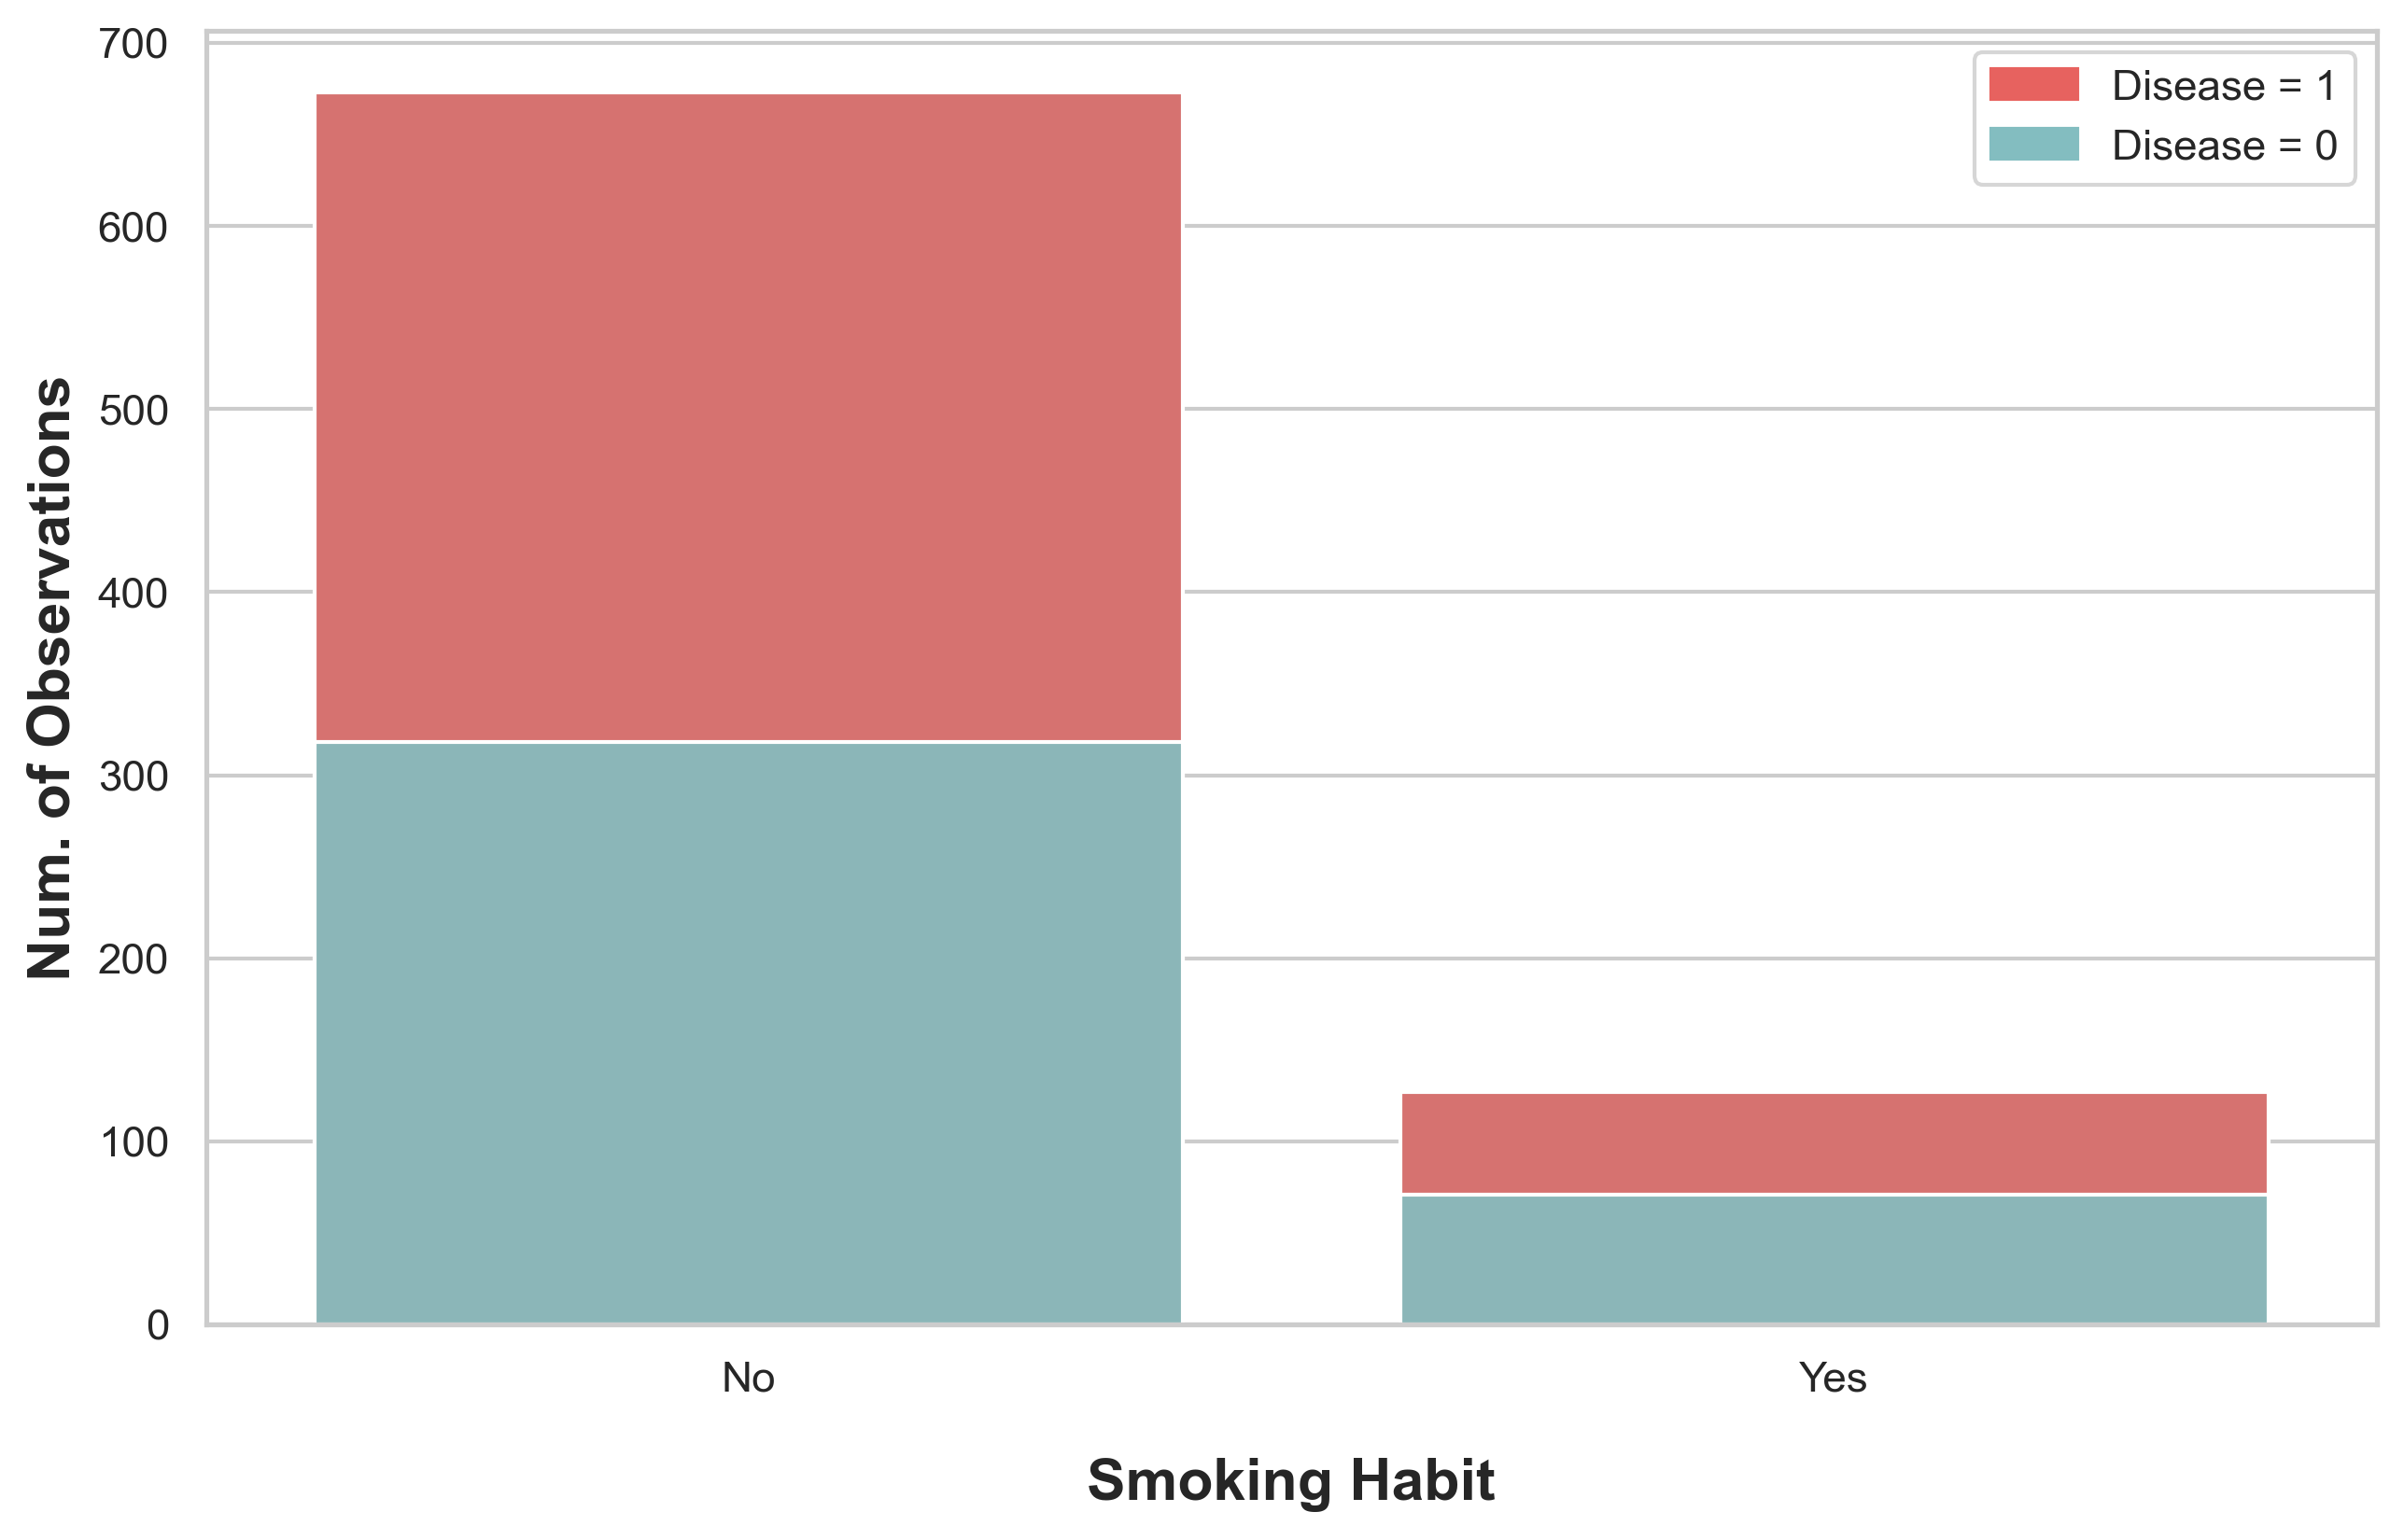

In [105]:
plt.figure(figsize=(10, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Smoking_Habit')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Smoking_Habit')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Smoking_Habit", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Smoking_Habit", y="Disease", data=non_disease, color='#83BDC0')

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Smoking Habit", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Smoking_Habit.png', dpi=600, bbox_inches='tight')
plt.show()

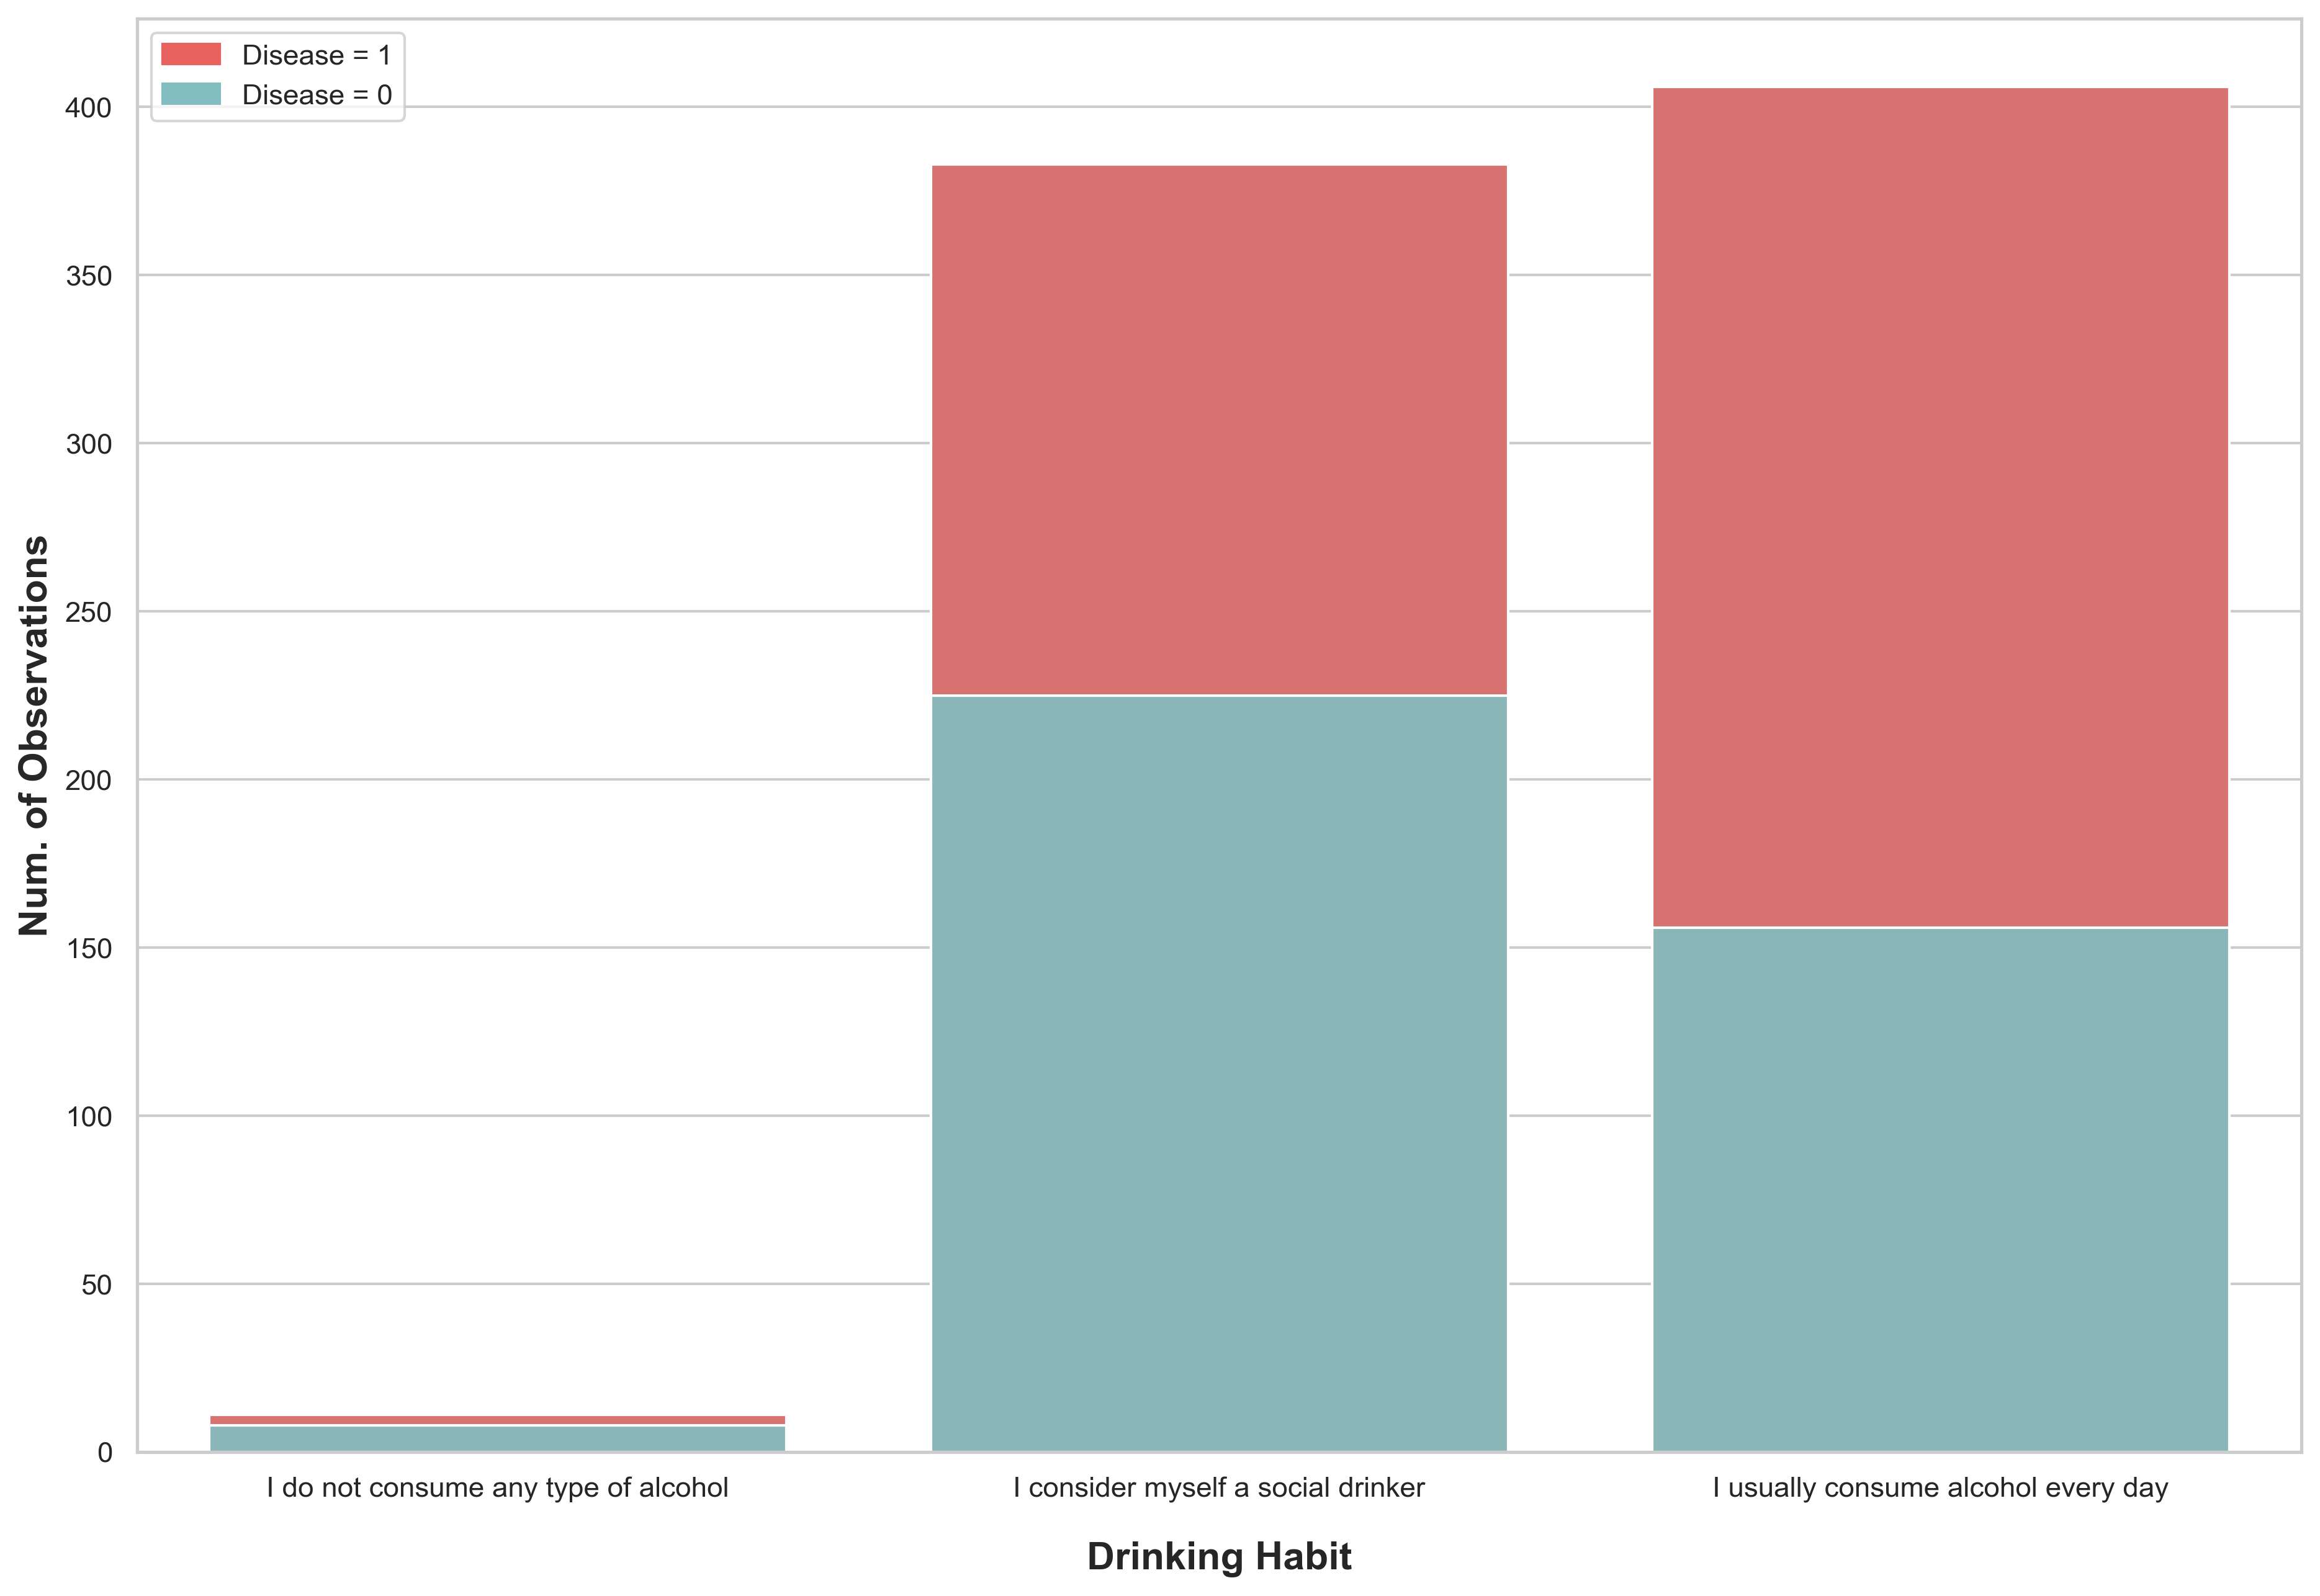

In [106]:
plt.figure(figsize=(15, 10), dpi=300)

order = list(train_patient['Drinking_Habit'].unique())

order.reverse()

# Getting value count
total = train_patient.groupby('Drinking_Habit')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Drinking_Habit')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Drinking_Habit", y="Disease", data=total, color='#E7625F', order=order)

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Drinking_Habit", y="Disease", data=non_disease, color='#83BDC0', order=order)

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Drinking Habit", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Drinking_Habit.png', dpi=600, bbox_inches='tight')
plt.show()

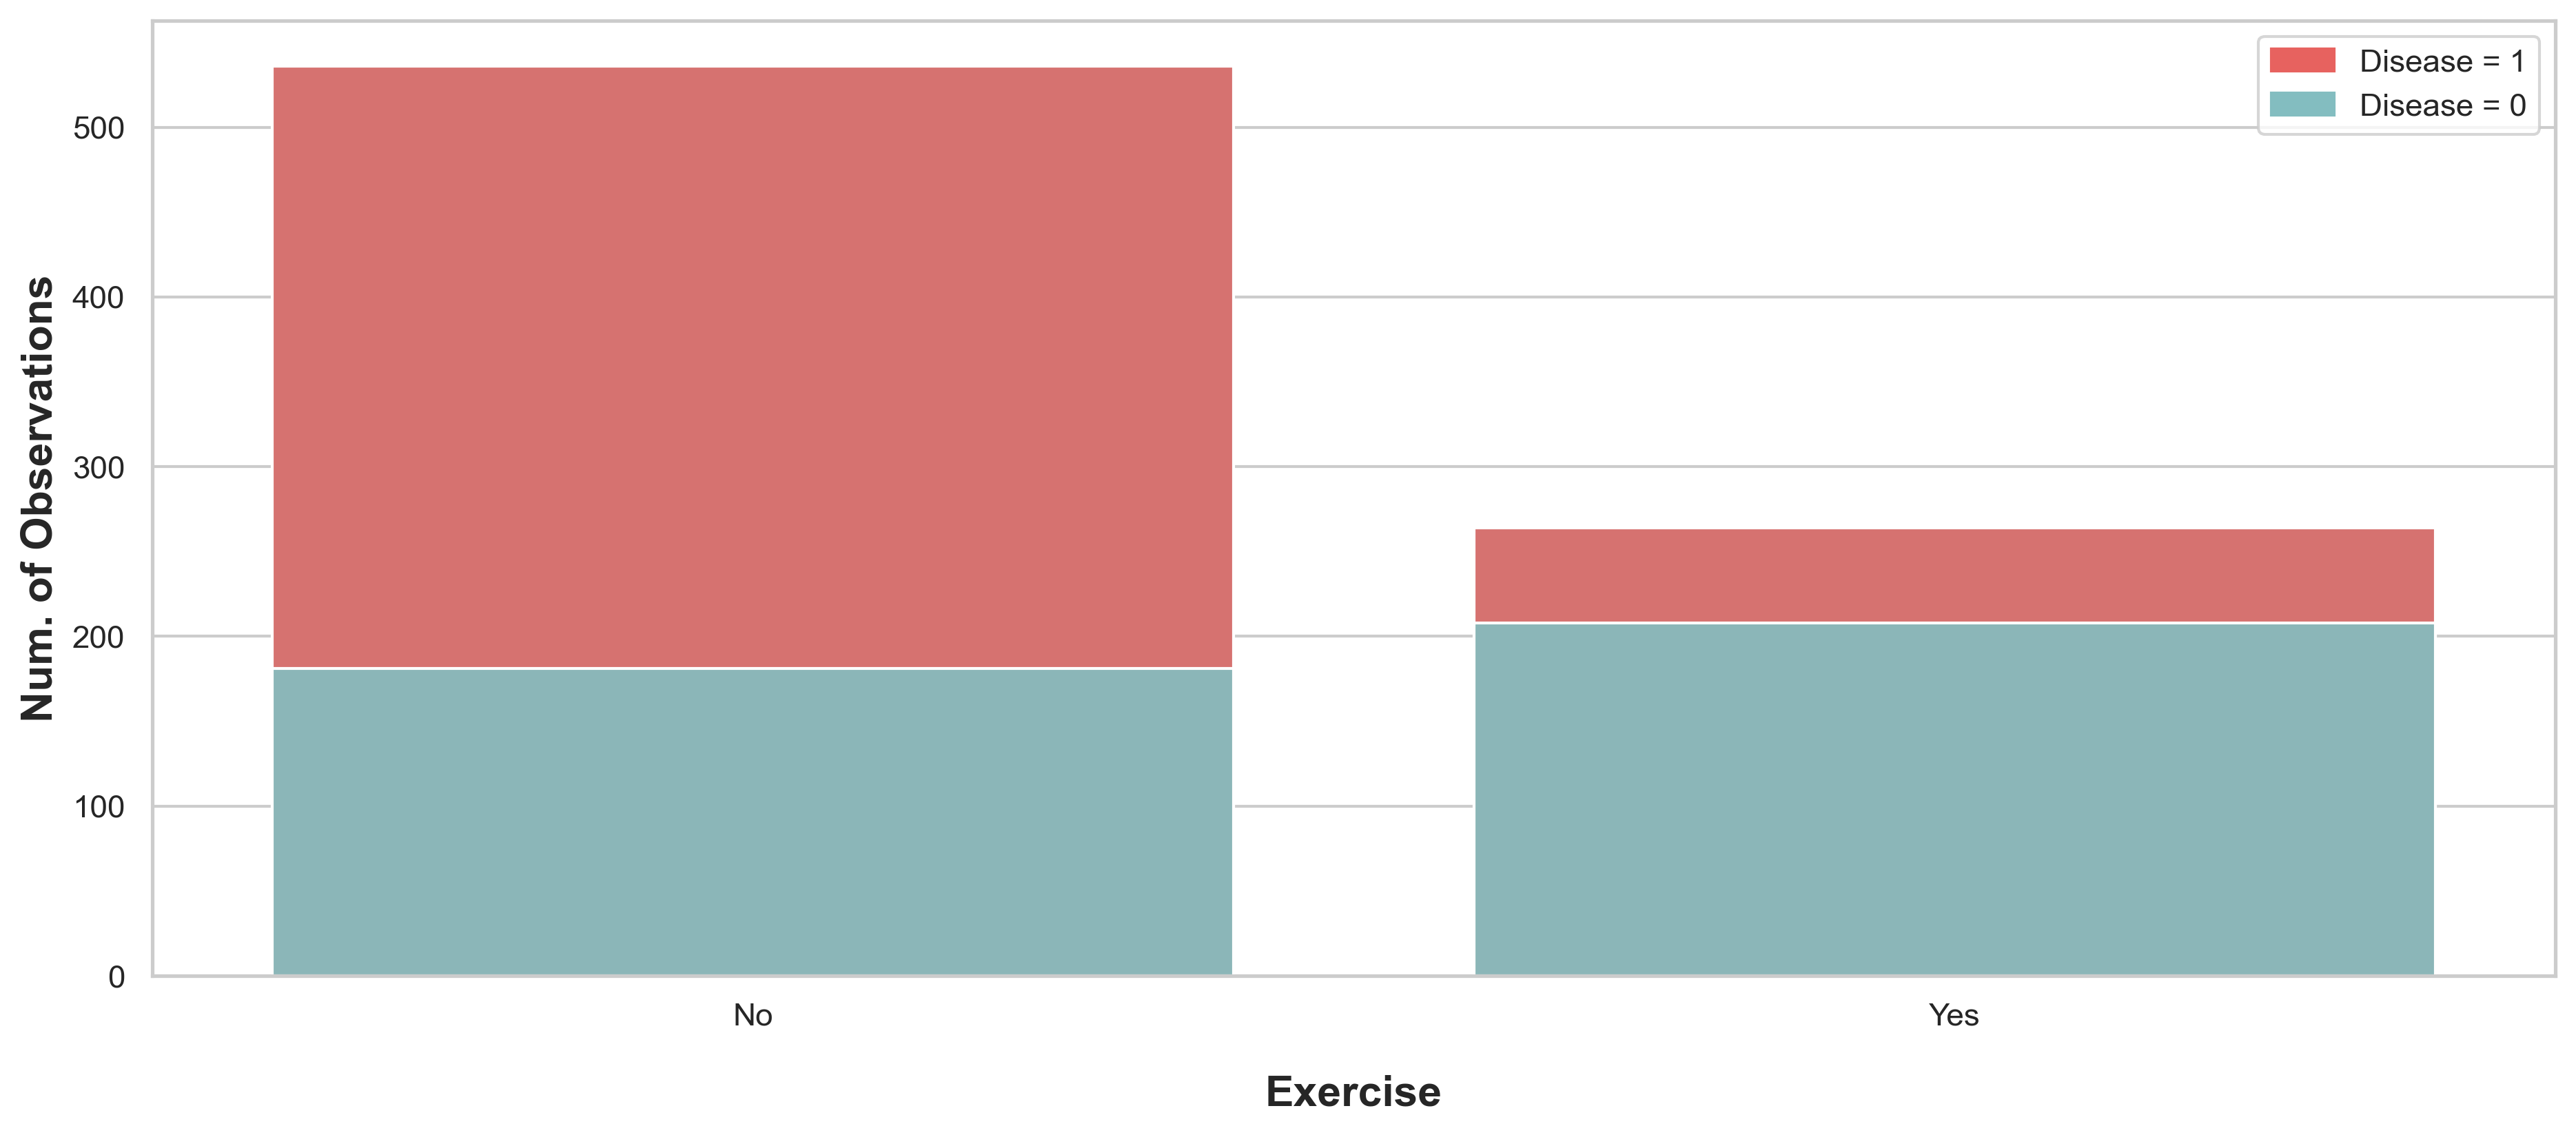

In [107]:
plt.figure(figsize=(15, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Exercise')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Exercise')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Exercise", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Exercise", y="Disease", data=non_disease, color='#83BDC0')

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Exercise", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Exercise.png', dpi=600, bbox_inches='tight')
plt.show()

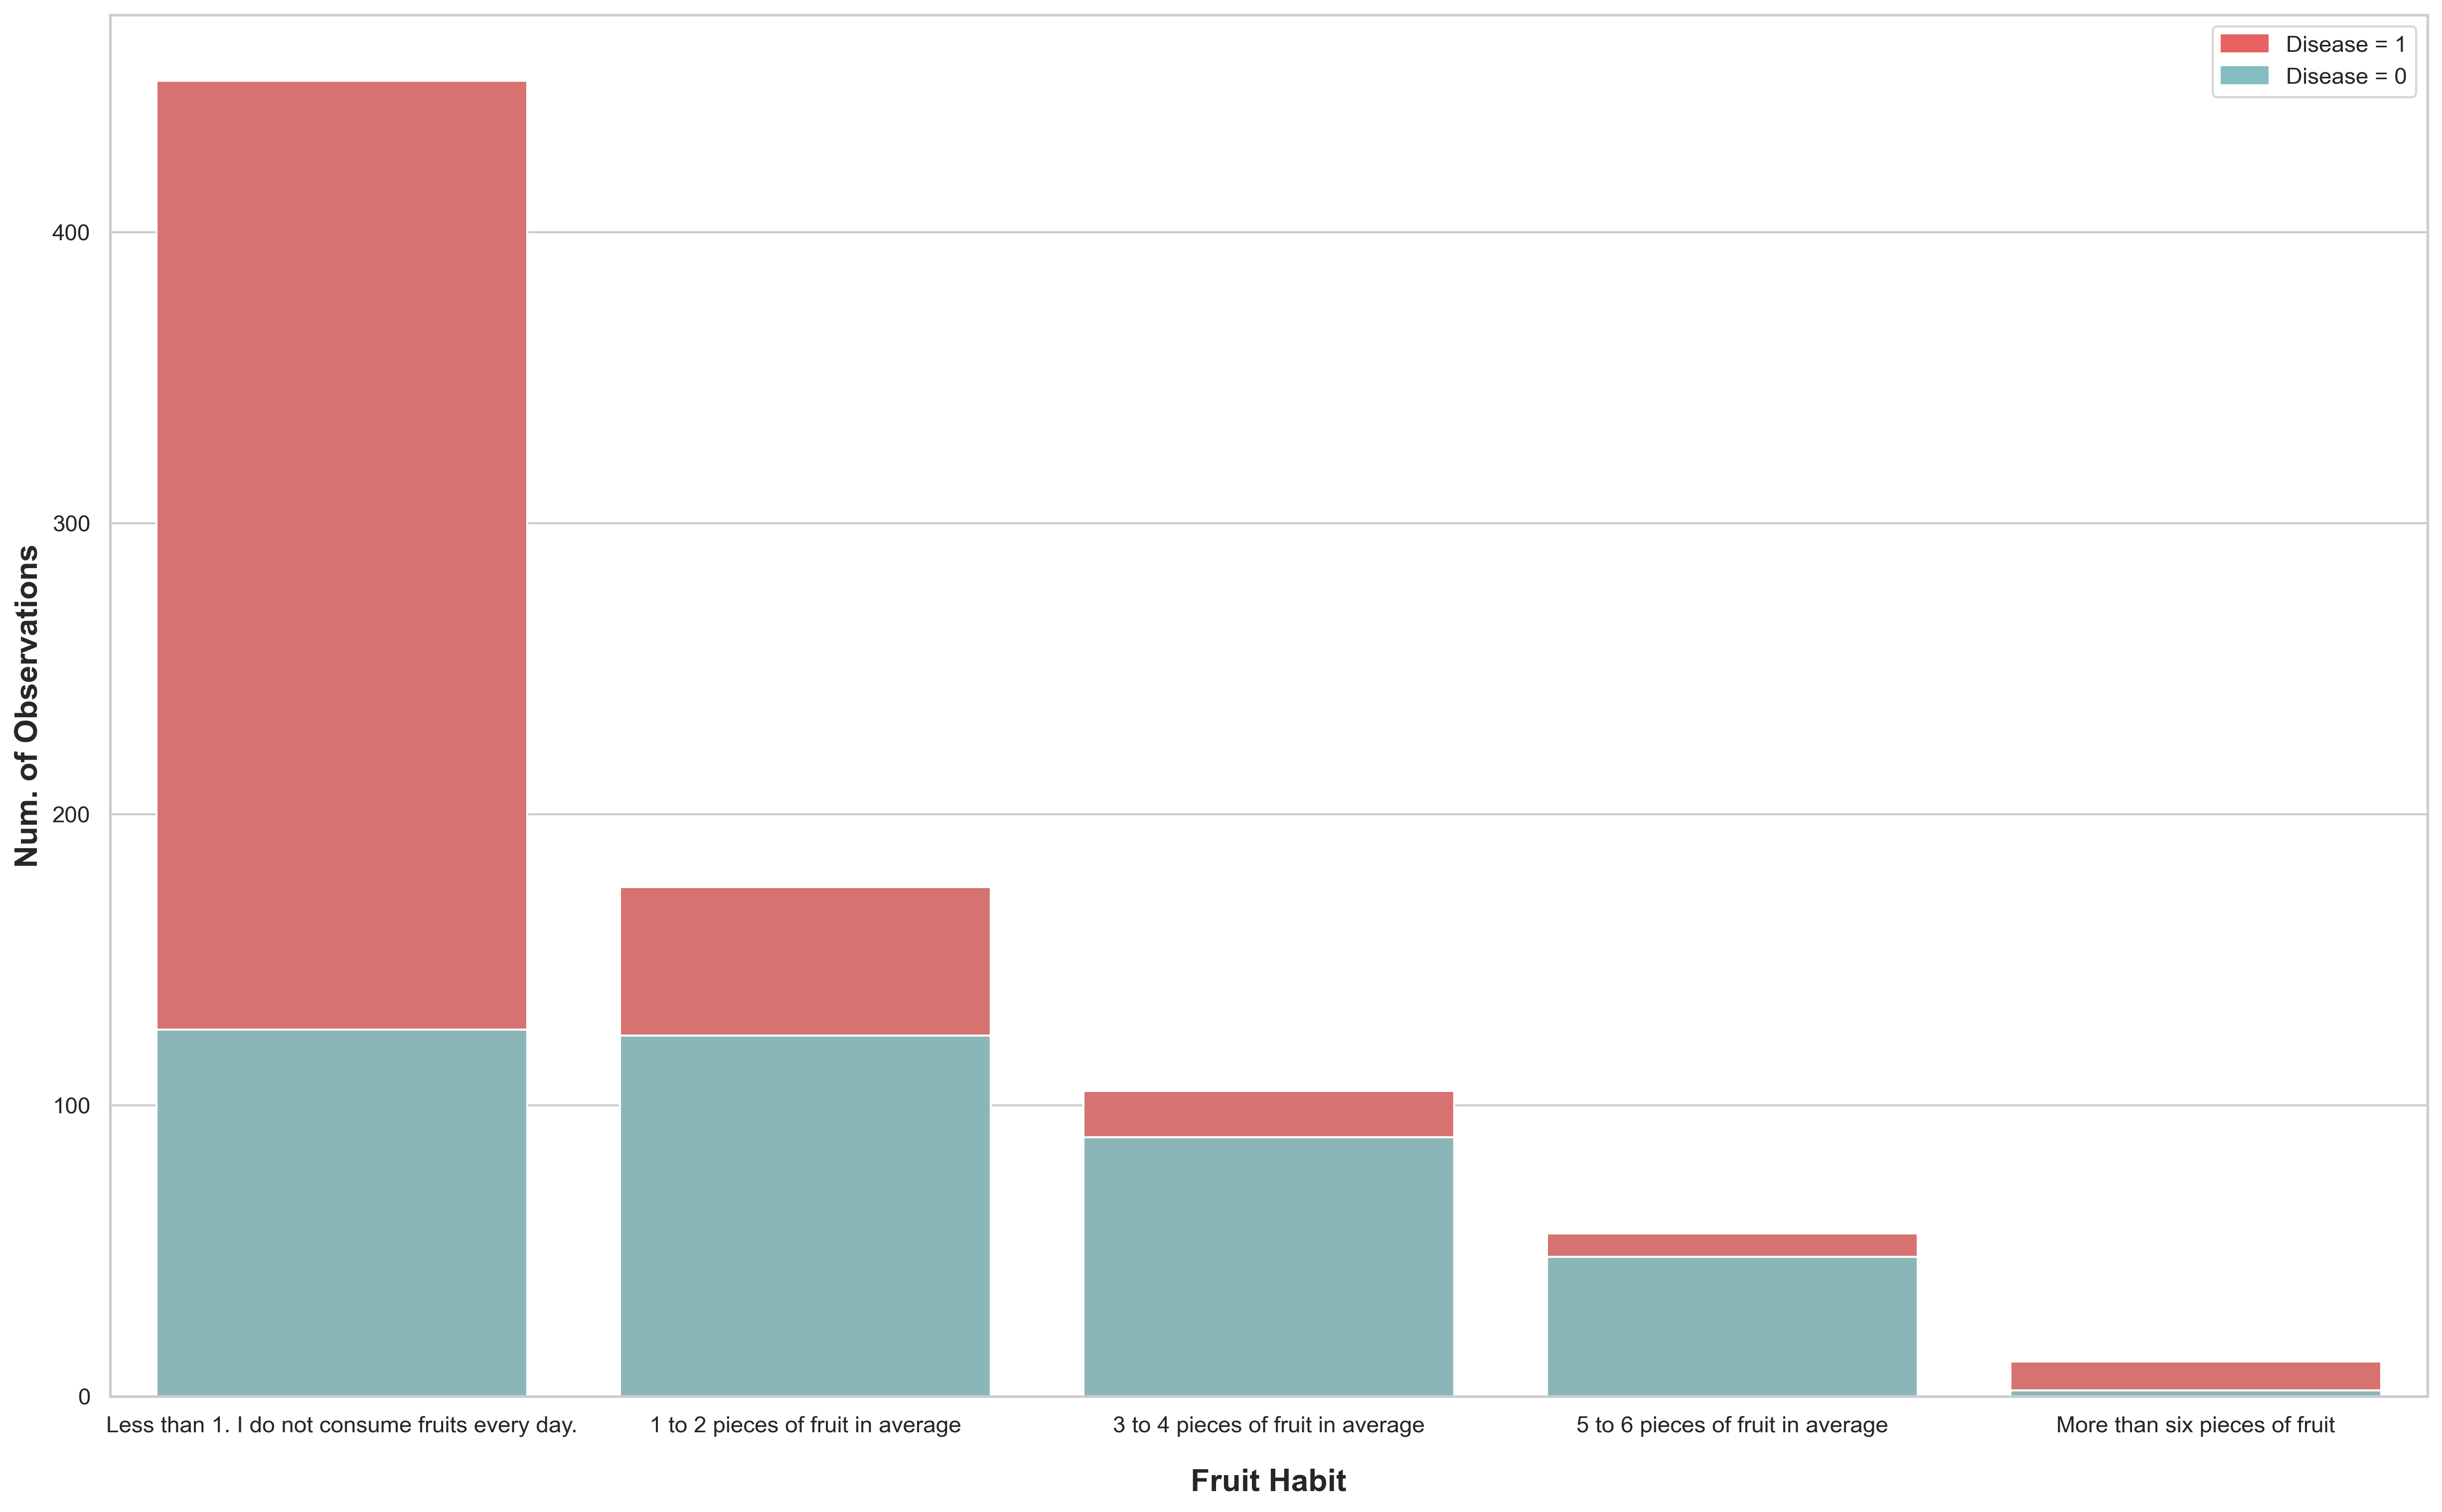

In [108]:
plt.figure(figsize=(20, 12), dpi=300)

# Getting value count
total = train_patient.groupby('Fruit_Habit')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Fruit_Habit')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Fruit_Habit", y="Disease", data=total, color='#E7625F', order=list(train_patient['Fruit_Habit'].unique()))

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Fruit_Habit", y="Disease", data=non_disease, color='#83BDC0', order=list(train_patient['Fruit_Habit'].unique()))

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Fruit Habit", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Fruit_Habit.png', dpi=600, bbox_inches='tight')
plt.show()

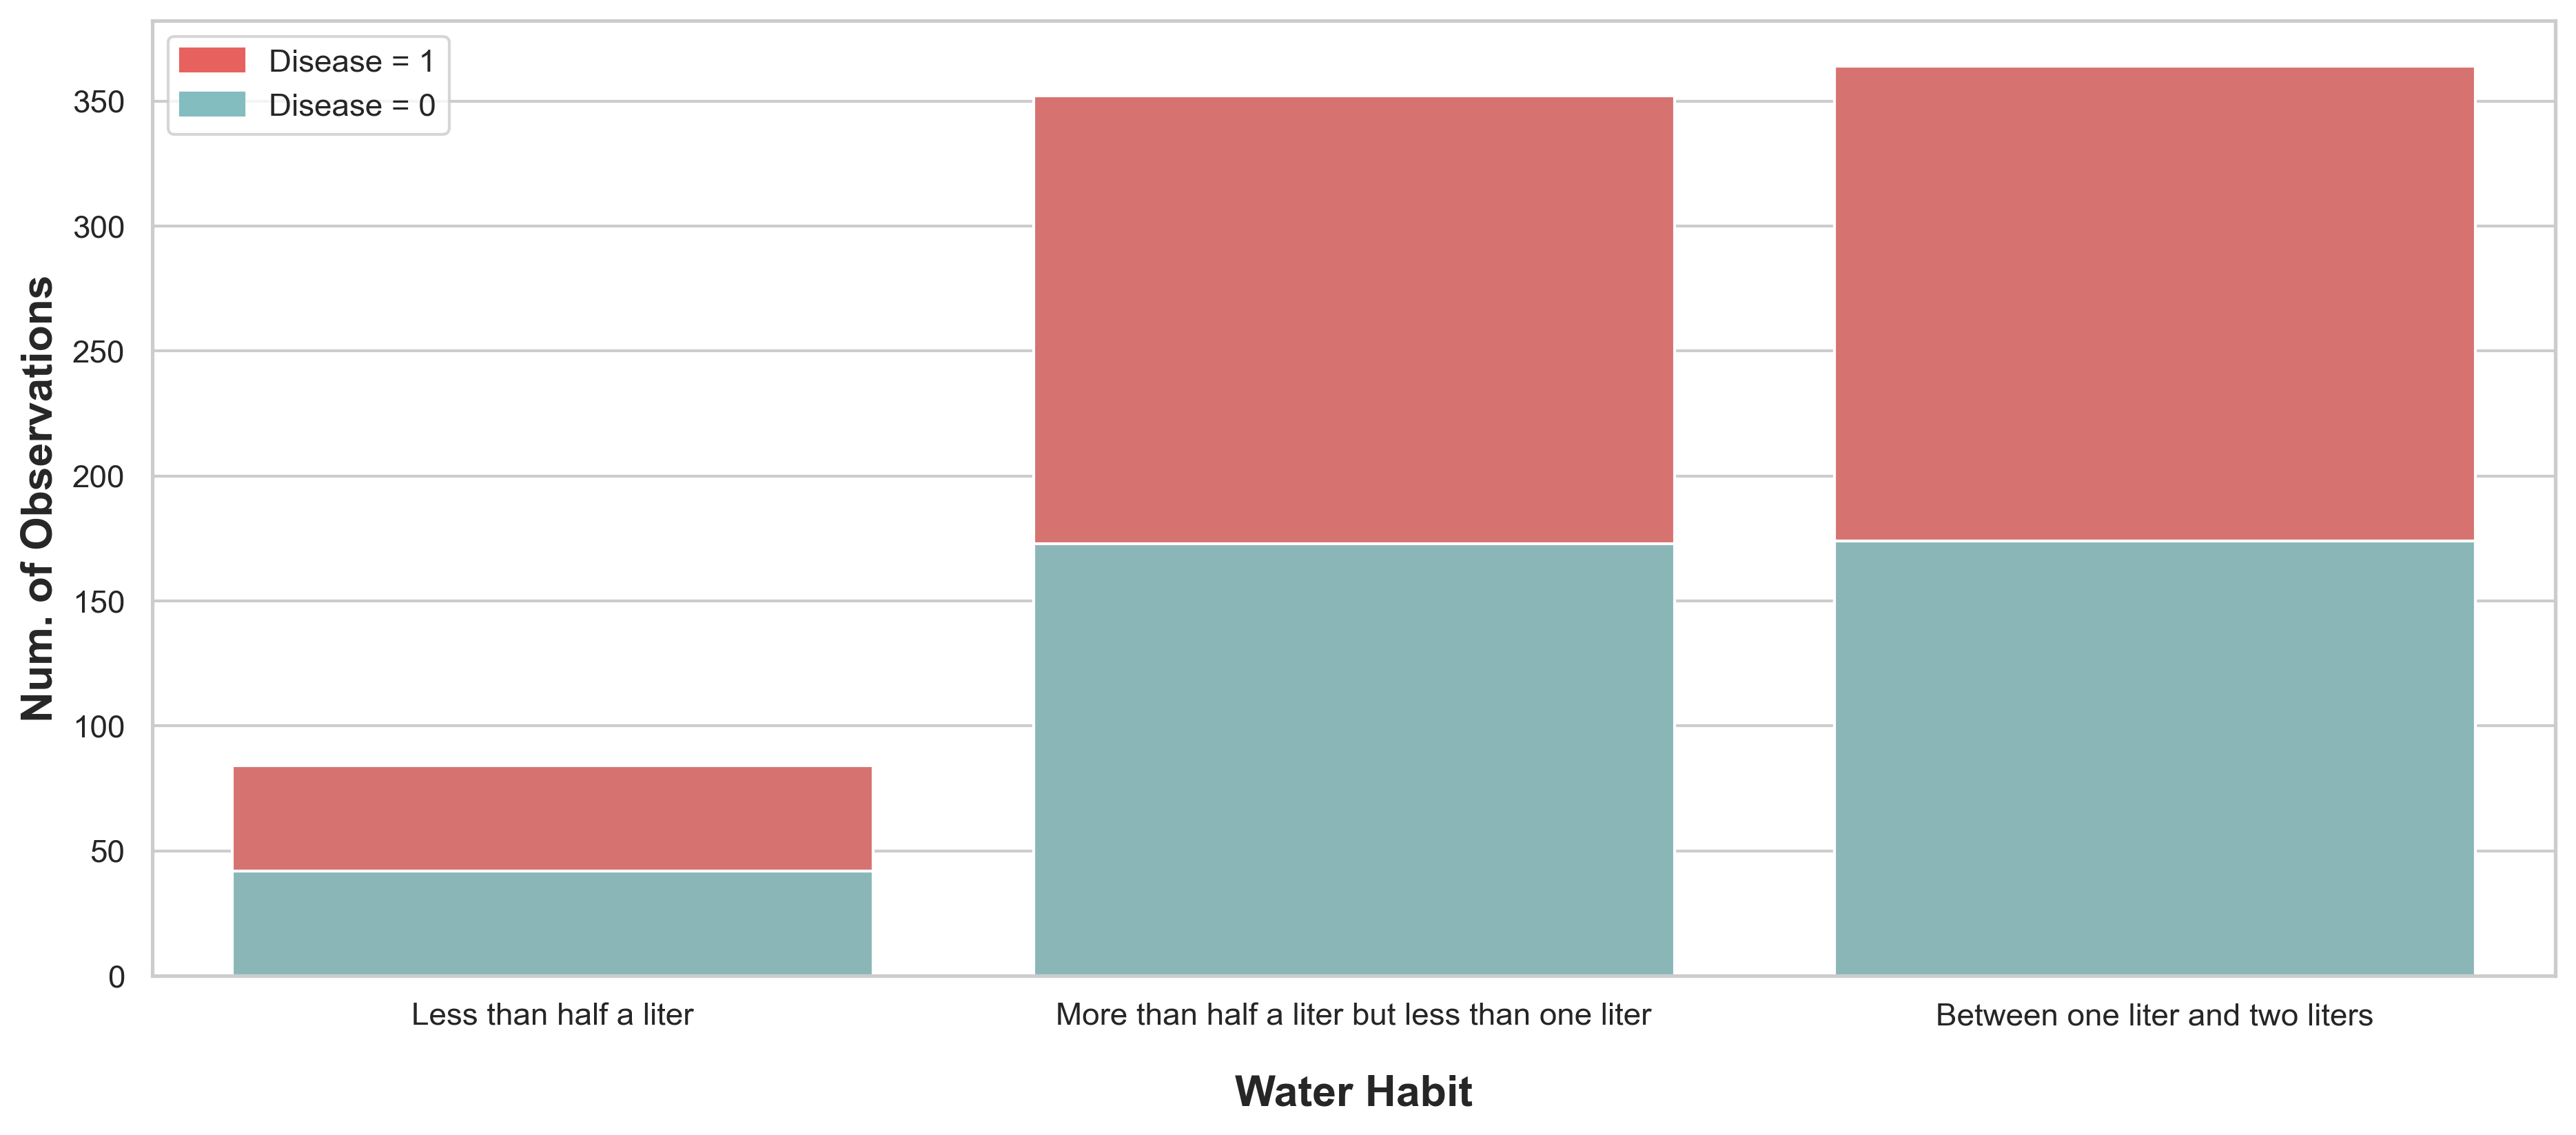

In [109]:
plt.figure(figsize=(15,6), dpi=300)

# Get the correct order of the different values
order = list(train_patient['Water_Habit'].unique())

order.reverse()

# Getting value count
total = train_patient.groupby('Water_Habit')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Water_Habit')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Water_Habit", y="Disease", data=total, color='#E7625F', order=order)

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Water_Habit", y="Disease", data=non_disease, color='#83BDC0', order=order)

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Water Habit", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Water_Habit.png', dpi=600, bbox_inches='tight')
plt.show()

### 1.4.2 Numerical Variables Exploration <a class="anchor" id="numericalvariablesexploration"></a>

In [117]:
cholesterol_categories = pd.cut(train_patient.High_Cholesterol, bins = [0,200,240,float("inf")], labels = ['Desirable','Borderline High','High'])

In [164]:
cholesterol_categories.to_frame()

,High_Cholesterol
PatientID,
1167,High
1805,Borderline High
1557,Borderline High
1658,High
1544,High
...,...
1909,Borderline High
1386,Borderline High
1088,High


In [169]:
non_disease = train_patient[train_patient['Disease'] == 0]['Disease'].to_frame().join(cholesterol_categories)

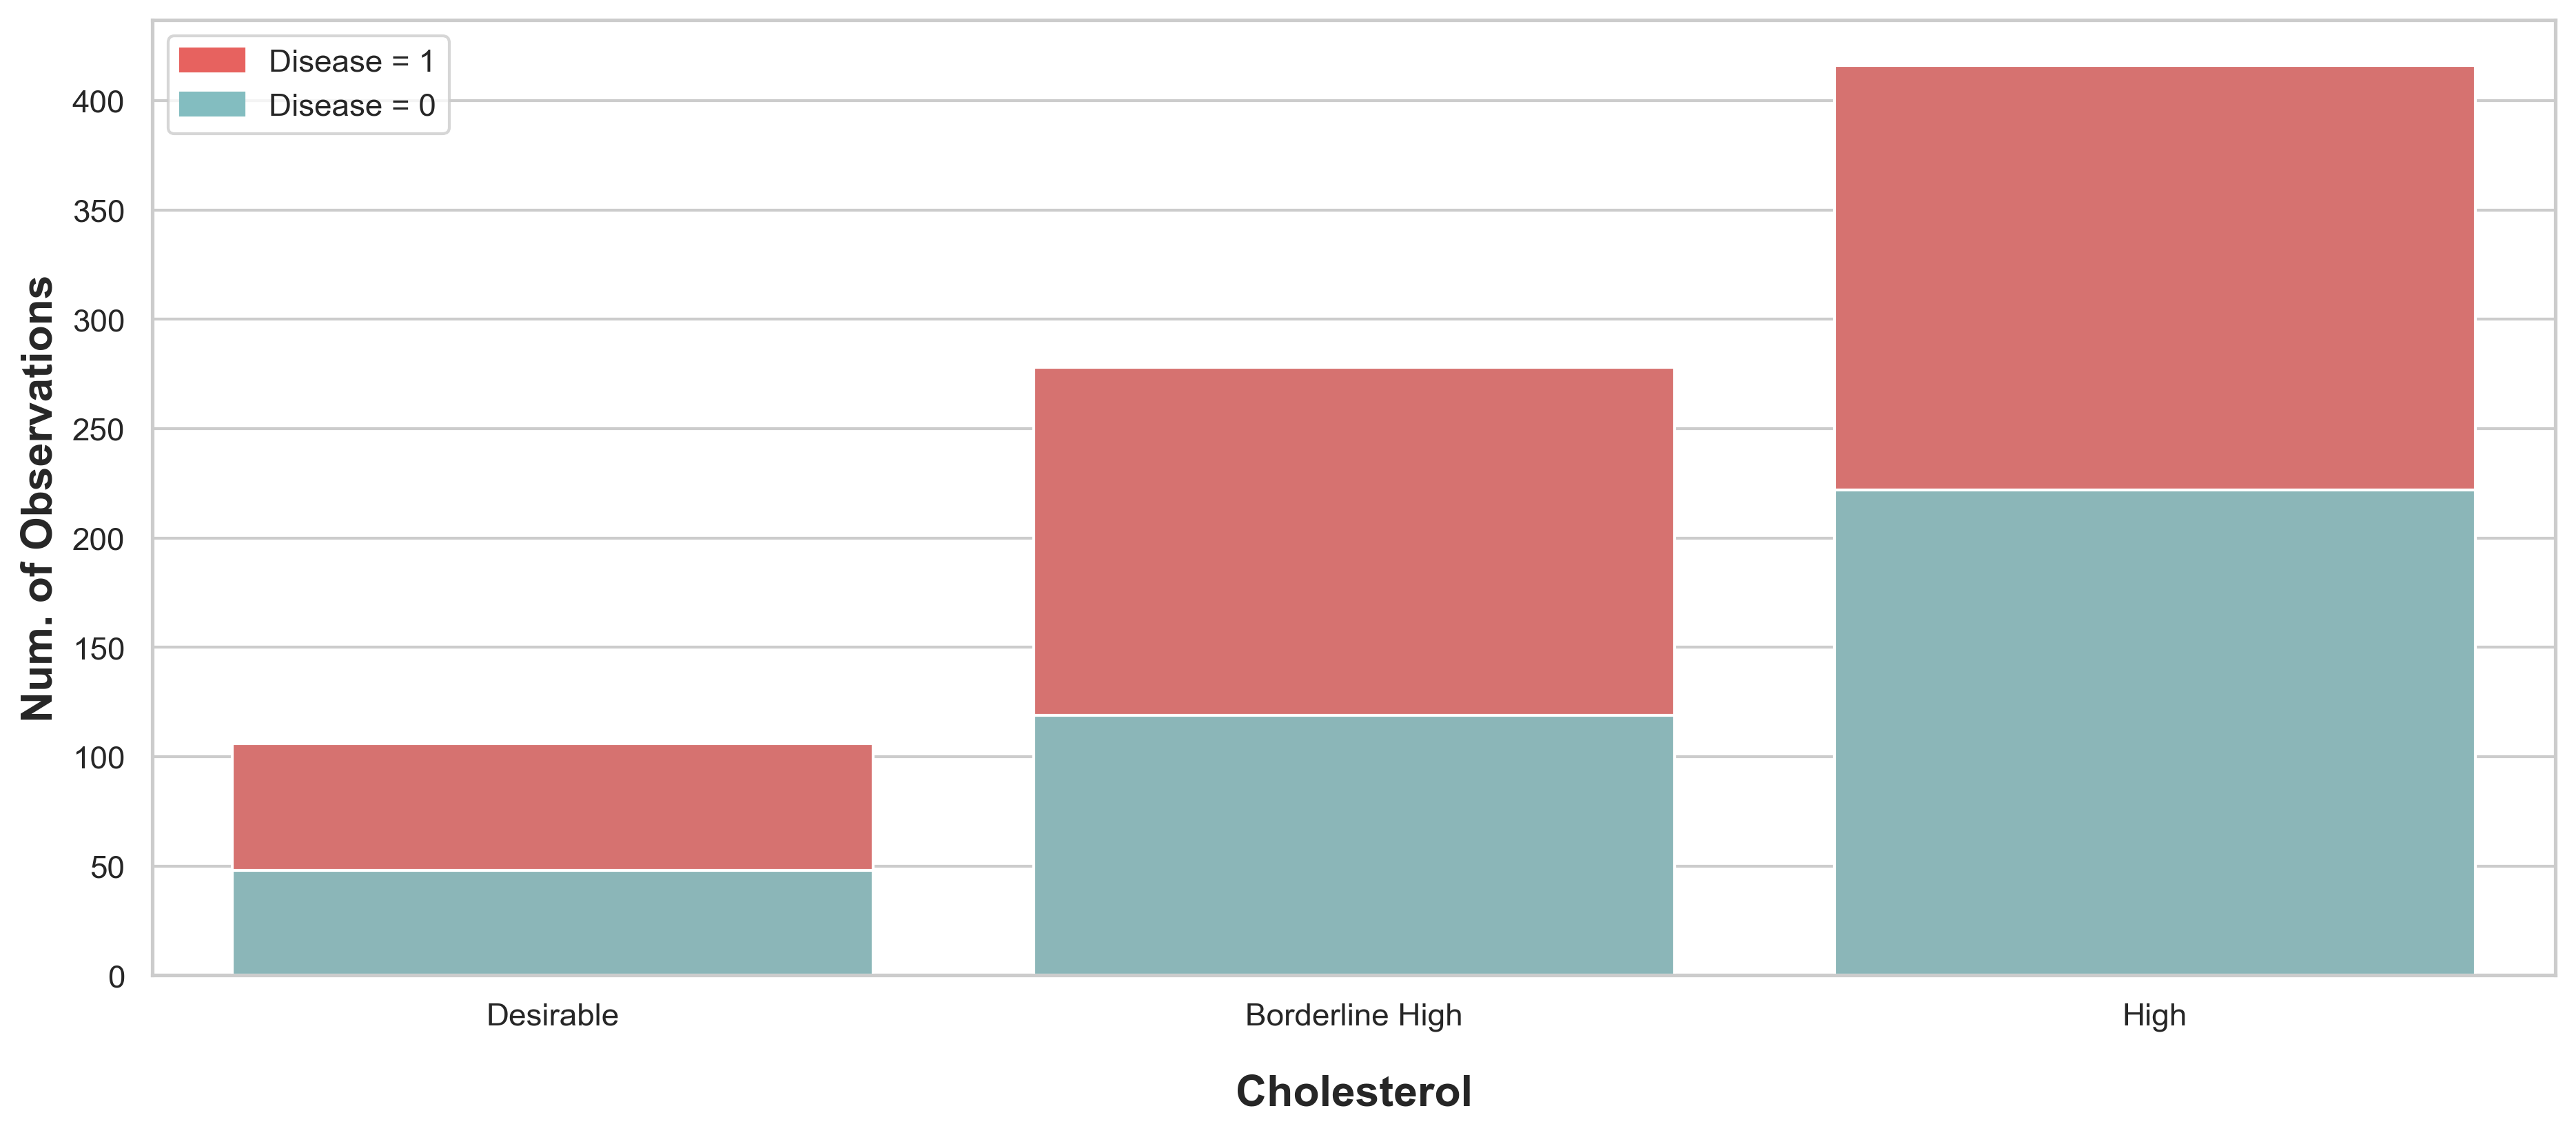

In [174]:
plt.figure(figsize=(15, 6), dpi=300)

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.countplot(x=cholesterol_categories, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.countplot(x="High_Cholesterol", data=non_disease, color='#83BDC0')

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Cholesterol", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Cholesterol.png', dpi=600, bbox_inches='tight')
plt.show()

In [113]:
pd.DataFrame(cholesterol_categories.value_counts(normalize = True)).rename(columns={"High_Cholesterol": "% of people"})

,% of people
High,0.5200
Borderline High,0.3475
Desirable,0.1325


In [176]:
blood_pressure_categories = pd.qcut(train_patient.Blood_Pressure, q=4, labels = ['Low',"Regular","High","Very High"])

In [177]:
blood_pressure_categories.to_frame()

,Blood_Pressure
PatientID,
1167,Low
1805,Very High
1557,Regular
1658,Regular
1544,Regular
...,...
1909,Very High
1386,Low
1088,High


In [178]:
non_disease = train_patient[train_patient['Disease'] == 0]['Disease'].to_frame().join(blood_pressure_categories)

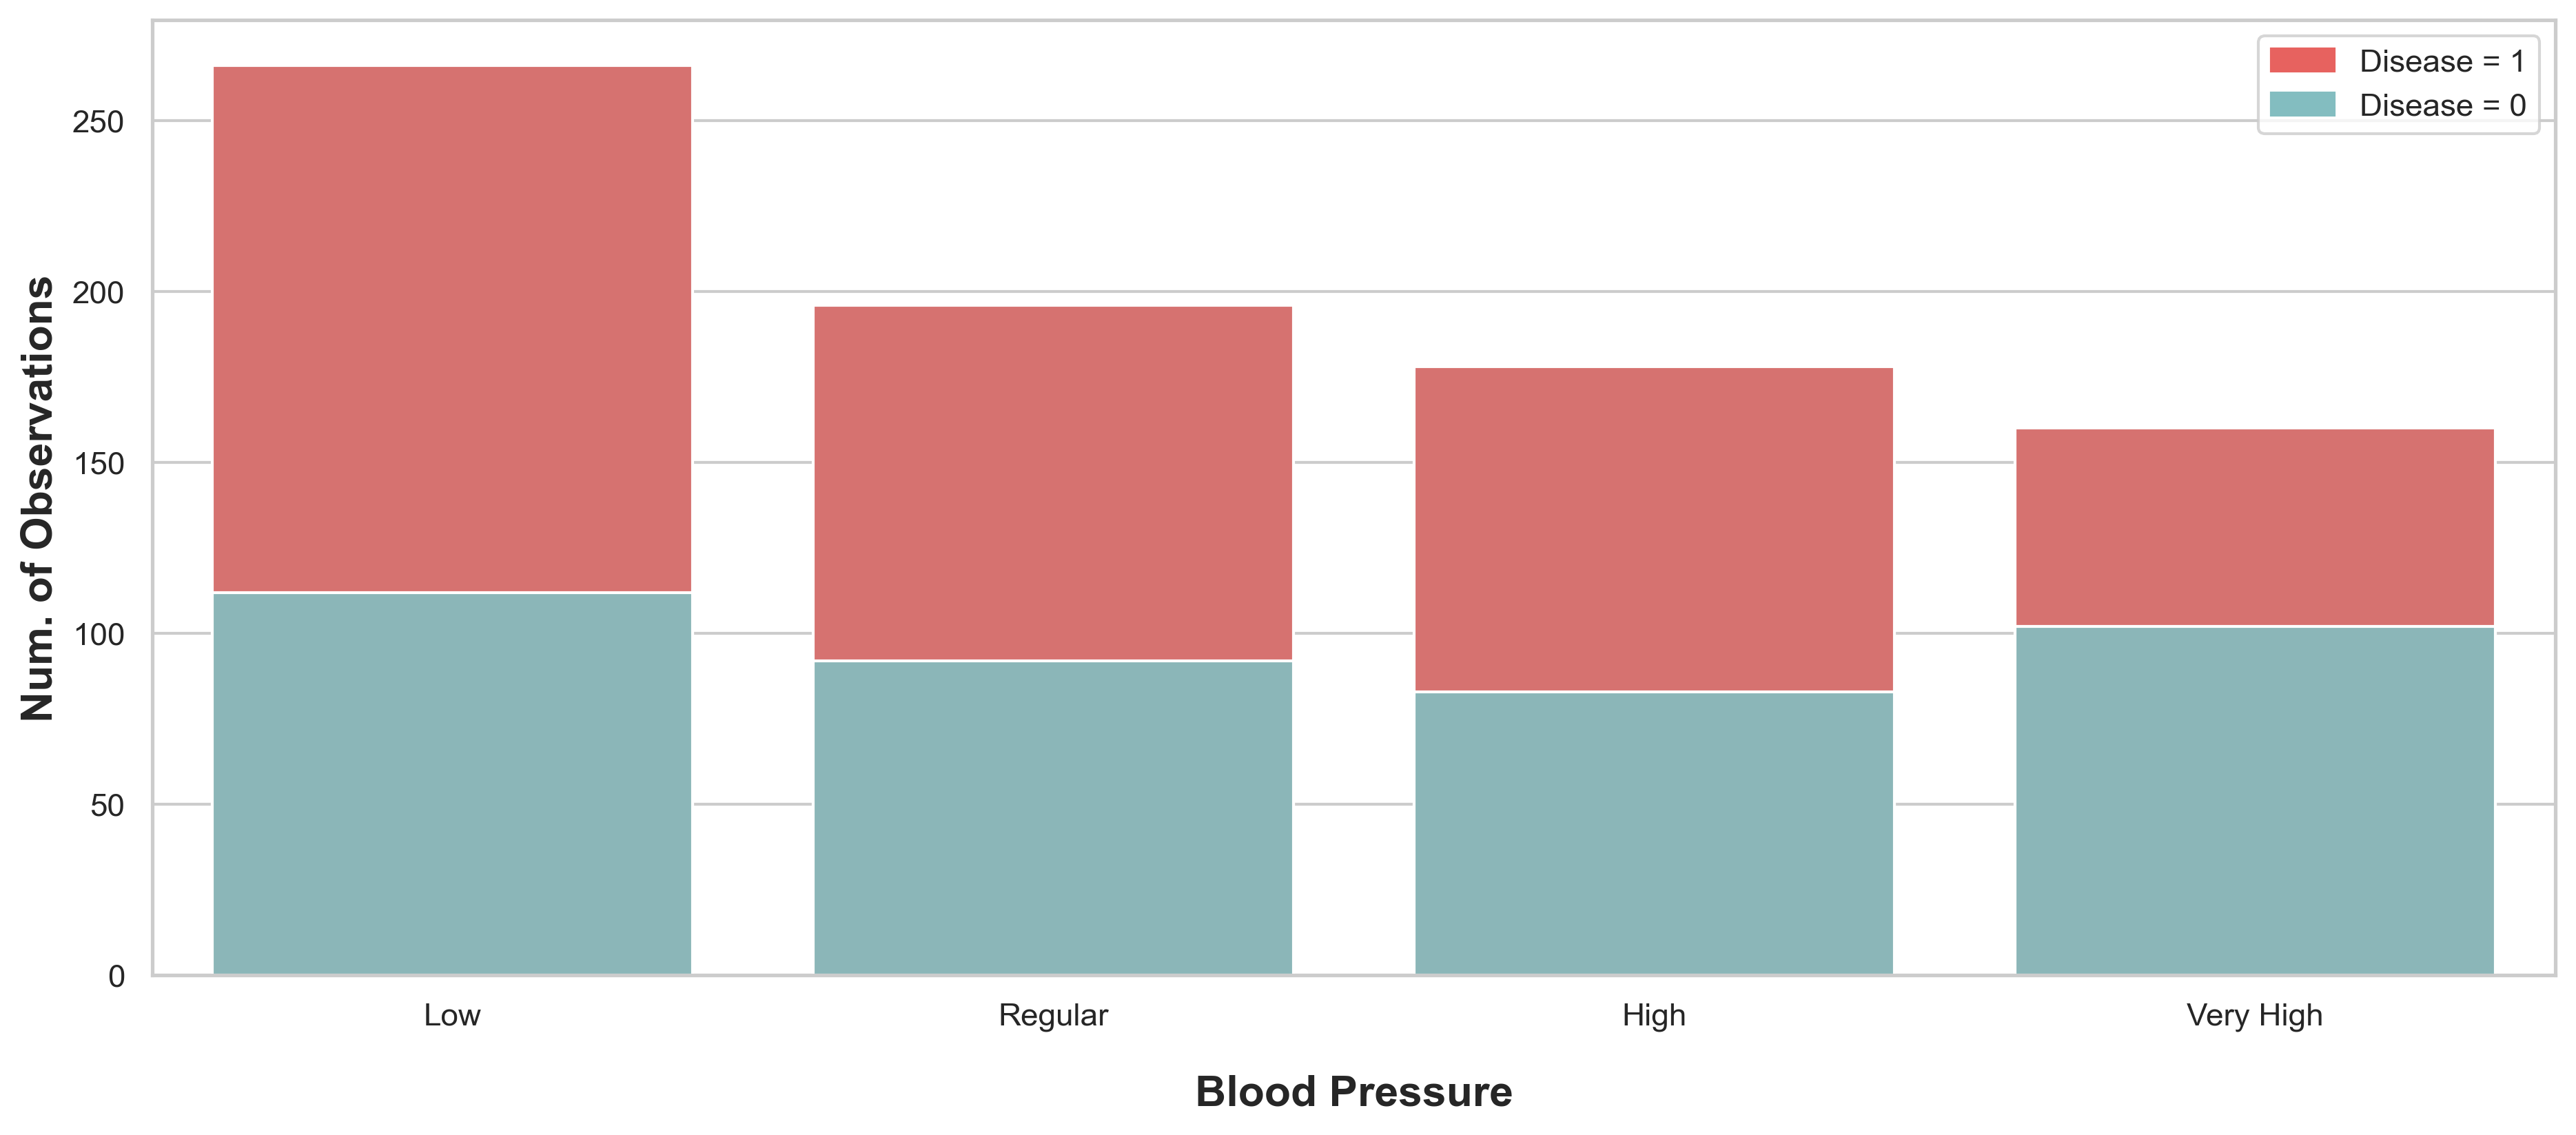

In [180]:
plt.figure(figsize=(15, 6), dpi=300)

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.countplot(x=blood_pressure_categories, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.countplot(x="Blood_Pressure", data=non_disease, color='#83BDC0')

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color='#83BDC0', label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Blood Pressure", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_BloodPressure.png', dpi=600, bbox_inches='tight')
plt.show()

In [181]:
pd.DataFrame(blood_pressure_categories.value_counts(normalize = True)).rename(columns={"Blood_Pressure": "% of people"})

,% of people
Low,0.3325
Regular,0.2450
High,0.2225
Very High,0.2000


## 2. Data Preparation and Preprocessing <a class="anchor" id="datapreprocessing"></a>

### 2.1 Coherence checking <a class="anchor" id="coherence"></a>

Mental and Physical health variables refer only to the last 30 days, therefore none of them should have a value greater than 30 or smaller than 0.

In [182]:
print("The maximum number of days in which a person had mental difficulties was", train_patient["Mental_Health"].max(), "and the least number of days was", train_patient["Mental_Health"].min())

The maximum number of days in which a person had mental difficulties was 29 and the least number of days was 0


In [183]:
print("The maximum number of days in which a person had physical difficulties was", train_patient["Physical_Health"].max(), "and the least number of days was", train_patient["Physical_Health"].min())

The maximum number of days in which a person had physical difficulties was 30 and the least number of days was 0


In [184]:
train_patient["Region"].value_counts()

East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

We can see that there is value were London is written in CAPS LOCK. This is something we must take care of.

In [185]:
train_patient.replace(to_replace="LONDON", value="London", inplace=True, limit=None)

In [186]:
train_patient["Region"].value_counts()

East Midlands               154
London                      141
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
Name: Region, dtype: int64

### 2.2 Feature Engineering <a class="anchor" id="featureengineering"></a>

Creating a gender variable based on the prefix in the Name.

In [187]:
#Create variable Gender
gender = []

for elem in train_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

train_patient['Gender'] = gender

print(train_patient['Gender'])

PatientID
1167    F
1805    M
1557    M
1658    M
1544    M
       ..
1909    M
1386    F
1088    F
1662    M
1117    M
Name: Gender, Length: 800, dtype: object


Converting the Birth Year to Age by subtracting it to the current Year.

In [188]:
train_patient['Age'] = datetime.now().year - train_patient['Birth_Year'] 
print(train_patient['Age'])

PatientID
1167     57
1805     53
1557     48
1658     64
1544     54
       ... 
1909     50
1386     42
1088    162
1662     47
1117     43
Name: Age, Length: 800, dtype: int64


Creating a variable of Body Mass Index using the Weight and Height variables.

In [189]:
#Create variable BMI     
train_patient['BMI'] = (train_patient['Weight']/(train_patient['Height']**2)*10000).round(2)

print(train_patient['BMI'])

PatientID
1167    27.89
1805    29.40
1557    25.91
1658    20.37
1544    17.90
        ...  
1909    19.25
1386    24.75
1088    17.21
1662    27.55
1117    23.39
Name: BMI, Length: 800, dtype: float64


In [190]:
train_patient.BMI.describe()

count    800.000000
mean      24.039500
std        3.658627
min       16.980000
25%       20.830000
50%       24.380000
75%       27.145000
max       30.120000
Name: BMI, dtype: float64

### 2.3 Treating Missing Values <a class="anchor" id="treatingmissingvalues"></a>

As we have seen, the only variable which had missing values was Education. Since it is a categorical variable, we will now fill the missing values using the mode.

In [193]:
train_patient['Education'].fillna(train_patient['Education'].mode()[0], inplace=True)

Checking that we no longer have missing values.

In [194]:
train_patient.isna().sum()

Name                0
Birth_Year          0
Region              0
Education           0
Disease             0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Gender              0
Age                 0
BMI                 0
BMI_Cat             0
dtype: int64

### 2.4 Outlier analysis <a class="anchor" id="outlieranalysis"></a>

Modifying the previously created variable for all the numerical features by replacing Birth_Year by Age and removing the dependent variable.

In [195]:
train_patient_num.drop(["Birth_Year"],axis = 1, inplace=True)
train_patient_num["Age"] = train_patient['Age']
train_patient_num

,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age
PatientID,,,,,,,,
1167,1,155,67,358,120,21,2,57
1805,1,173,88,230,142,9,0,53
1557,1,162,68,226,122,26,0,48
1658,0,180,66,313,125,13,8,64
1544,1,180,58,277,125,18,2,54
...,...,...,...,...,...,...,...,...
1909,0,178,61,204,144,12,4,50
1386,1,157,61,213,120,23,0,42
1088,0,167,48,272,140,20,17,162


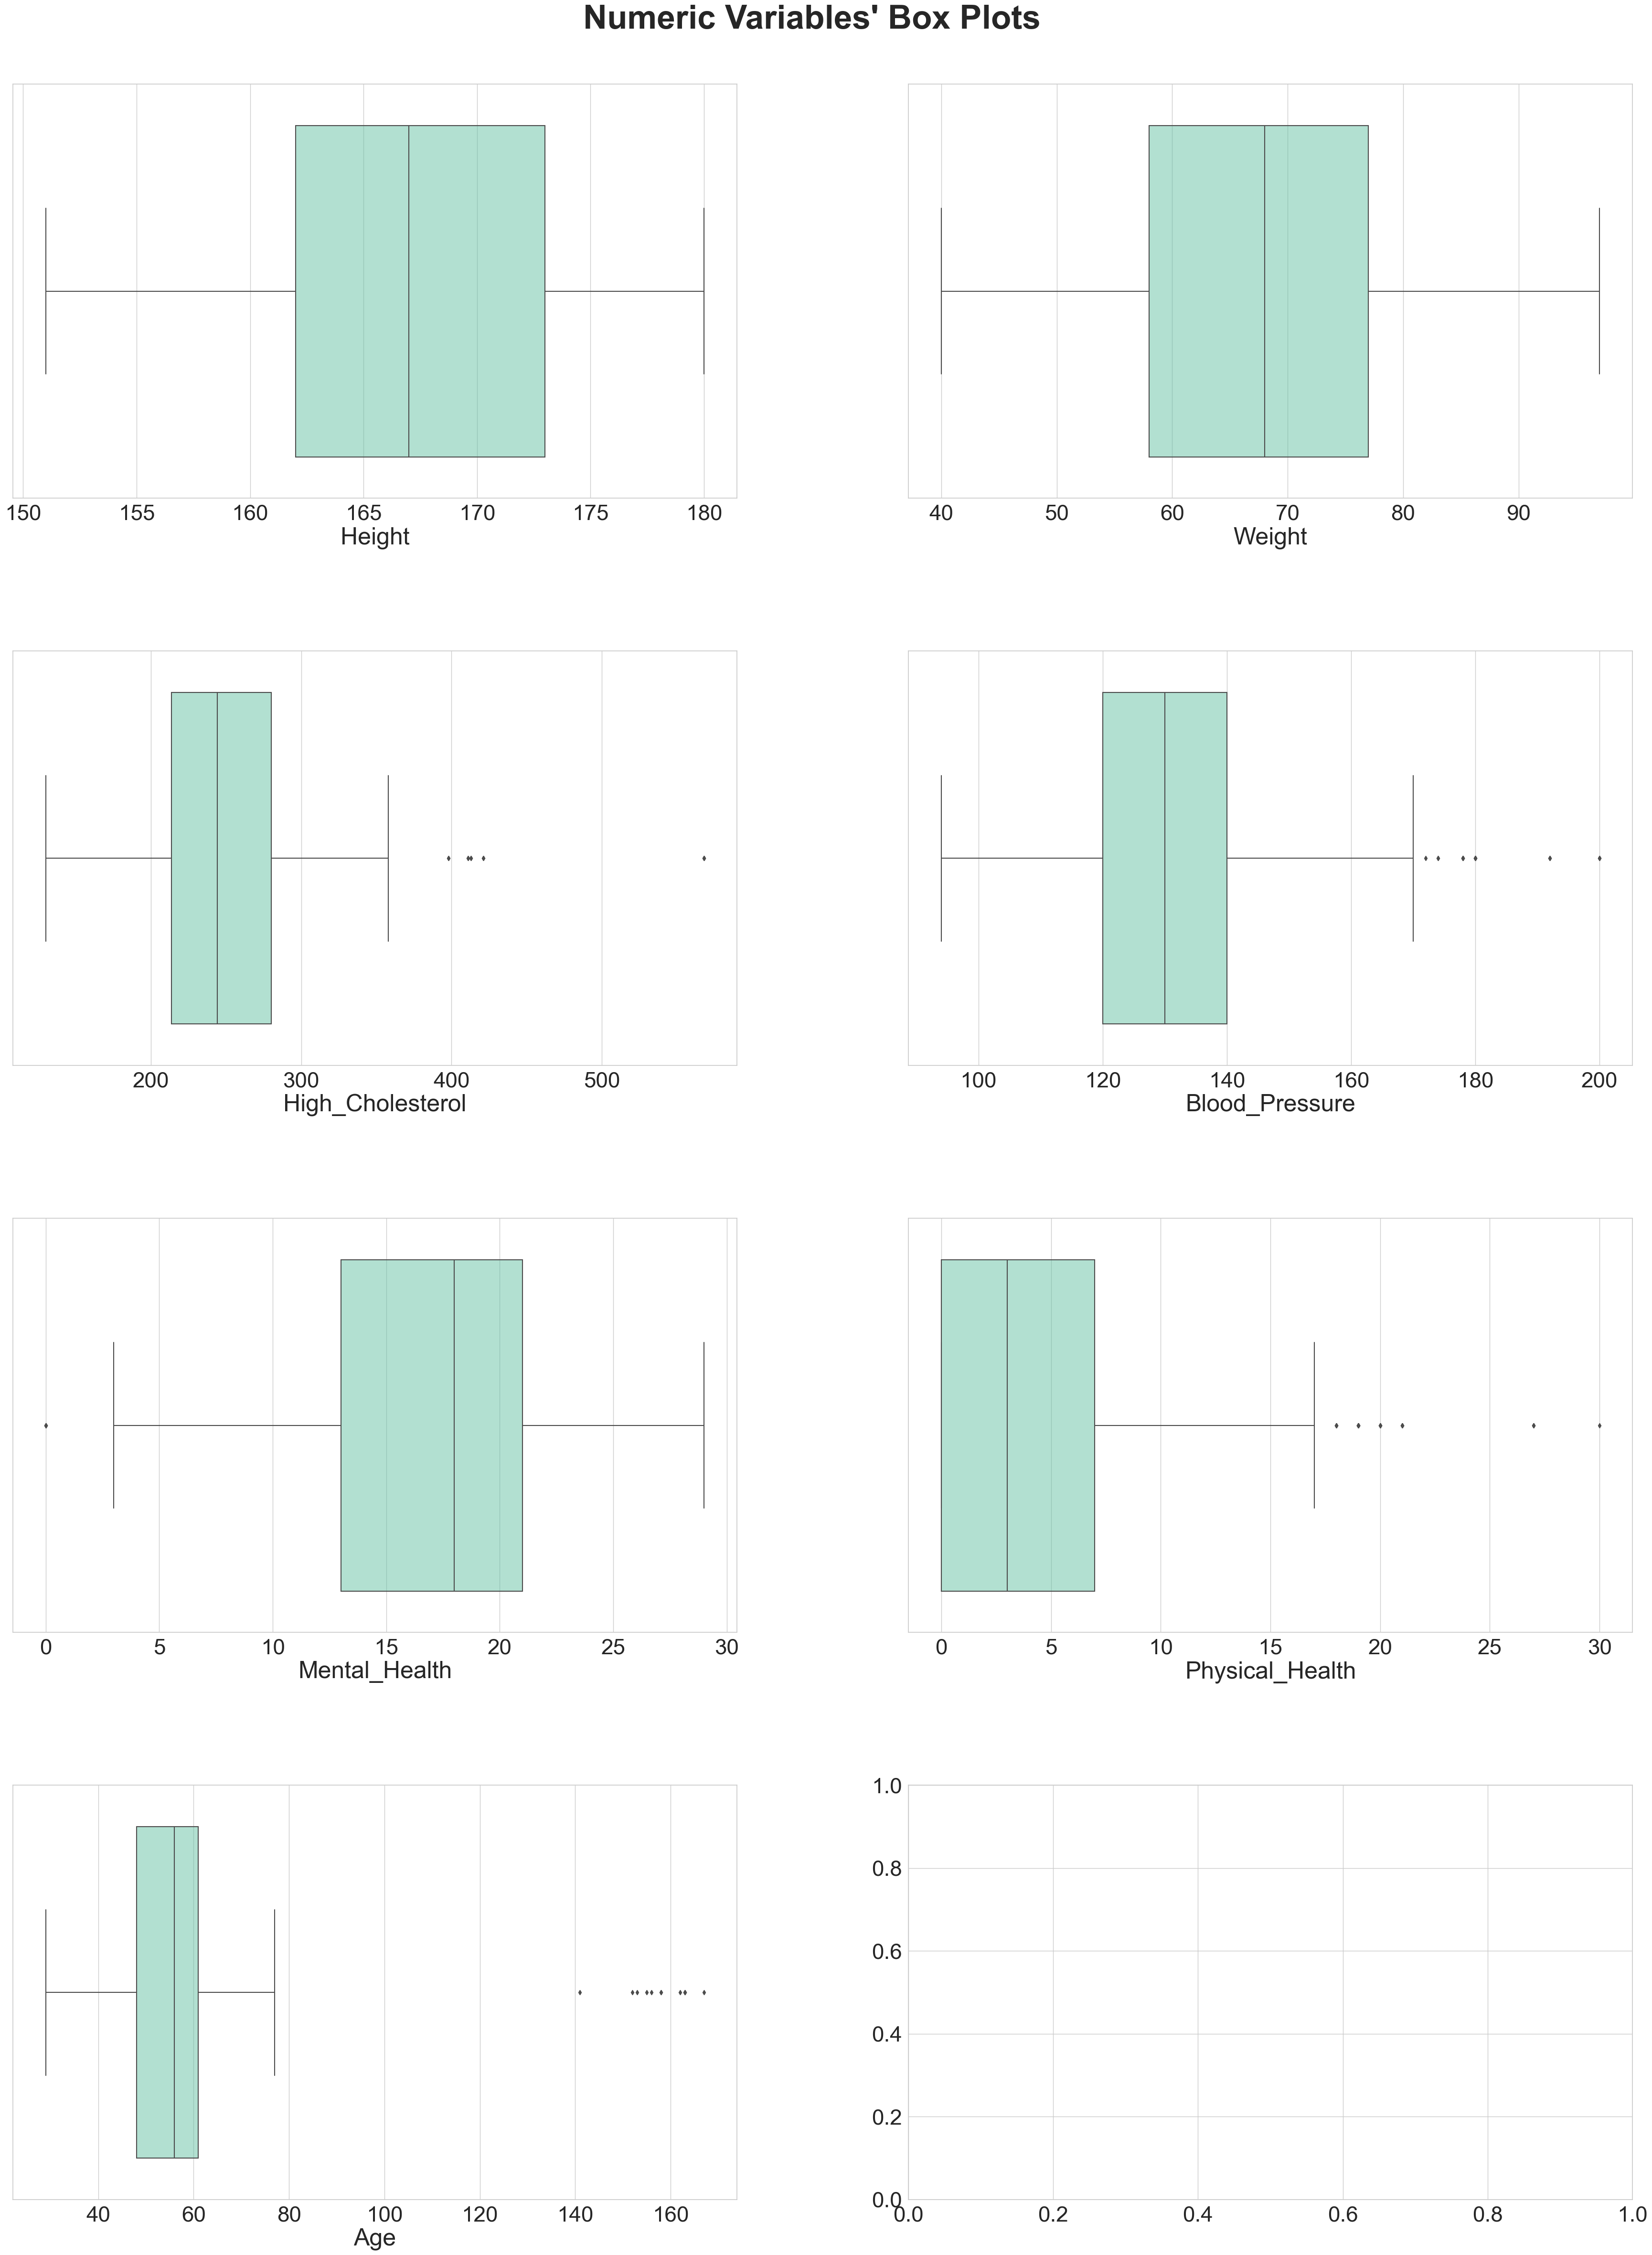

In [225]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(list(train_patient_num.columns.values)) / 5), figsize=(40, 50))
plt.tight_layout(pad=5)

# Plot data
for ax, feat in zip(axes.flatten(), list(train_patient_num.columns.values[1:])):
    sns.boxplot(x=train_patient[feat], 
                ax=ax, 
                boxprops={"facecolor": (0.4, 0.7607843137254902, 0.6470588235294118, .5)})

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, fontsize=50, fontweight="bold")
plt.savefig('Figures/Numeric Variables Box Plots.png', dpi=600, bbox_inches='tight')
plt.show()

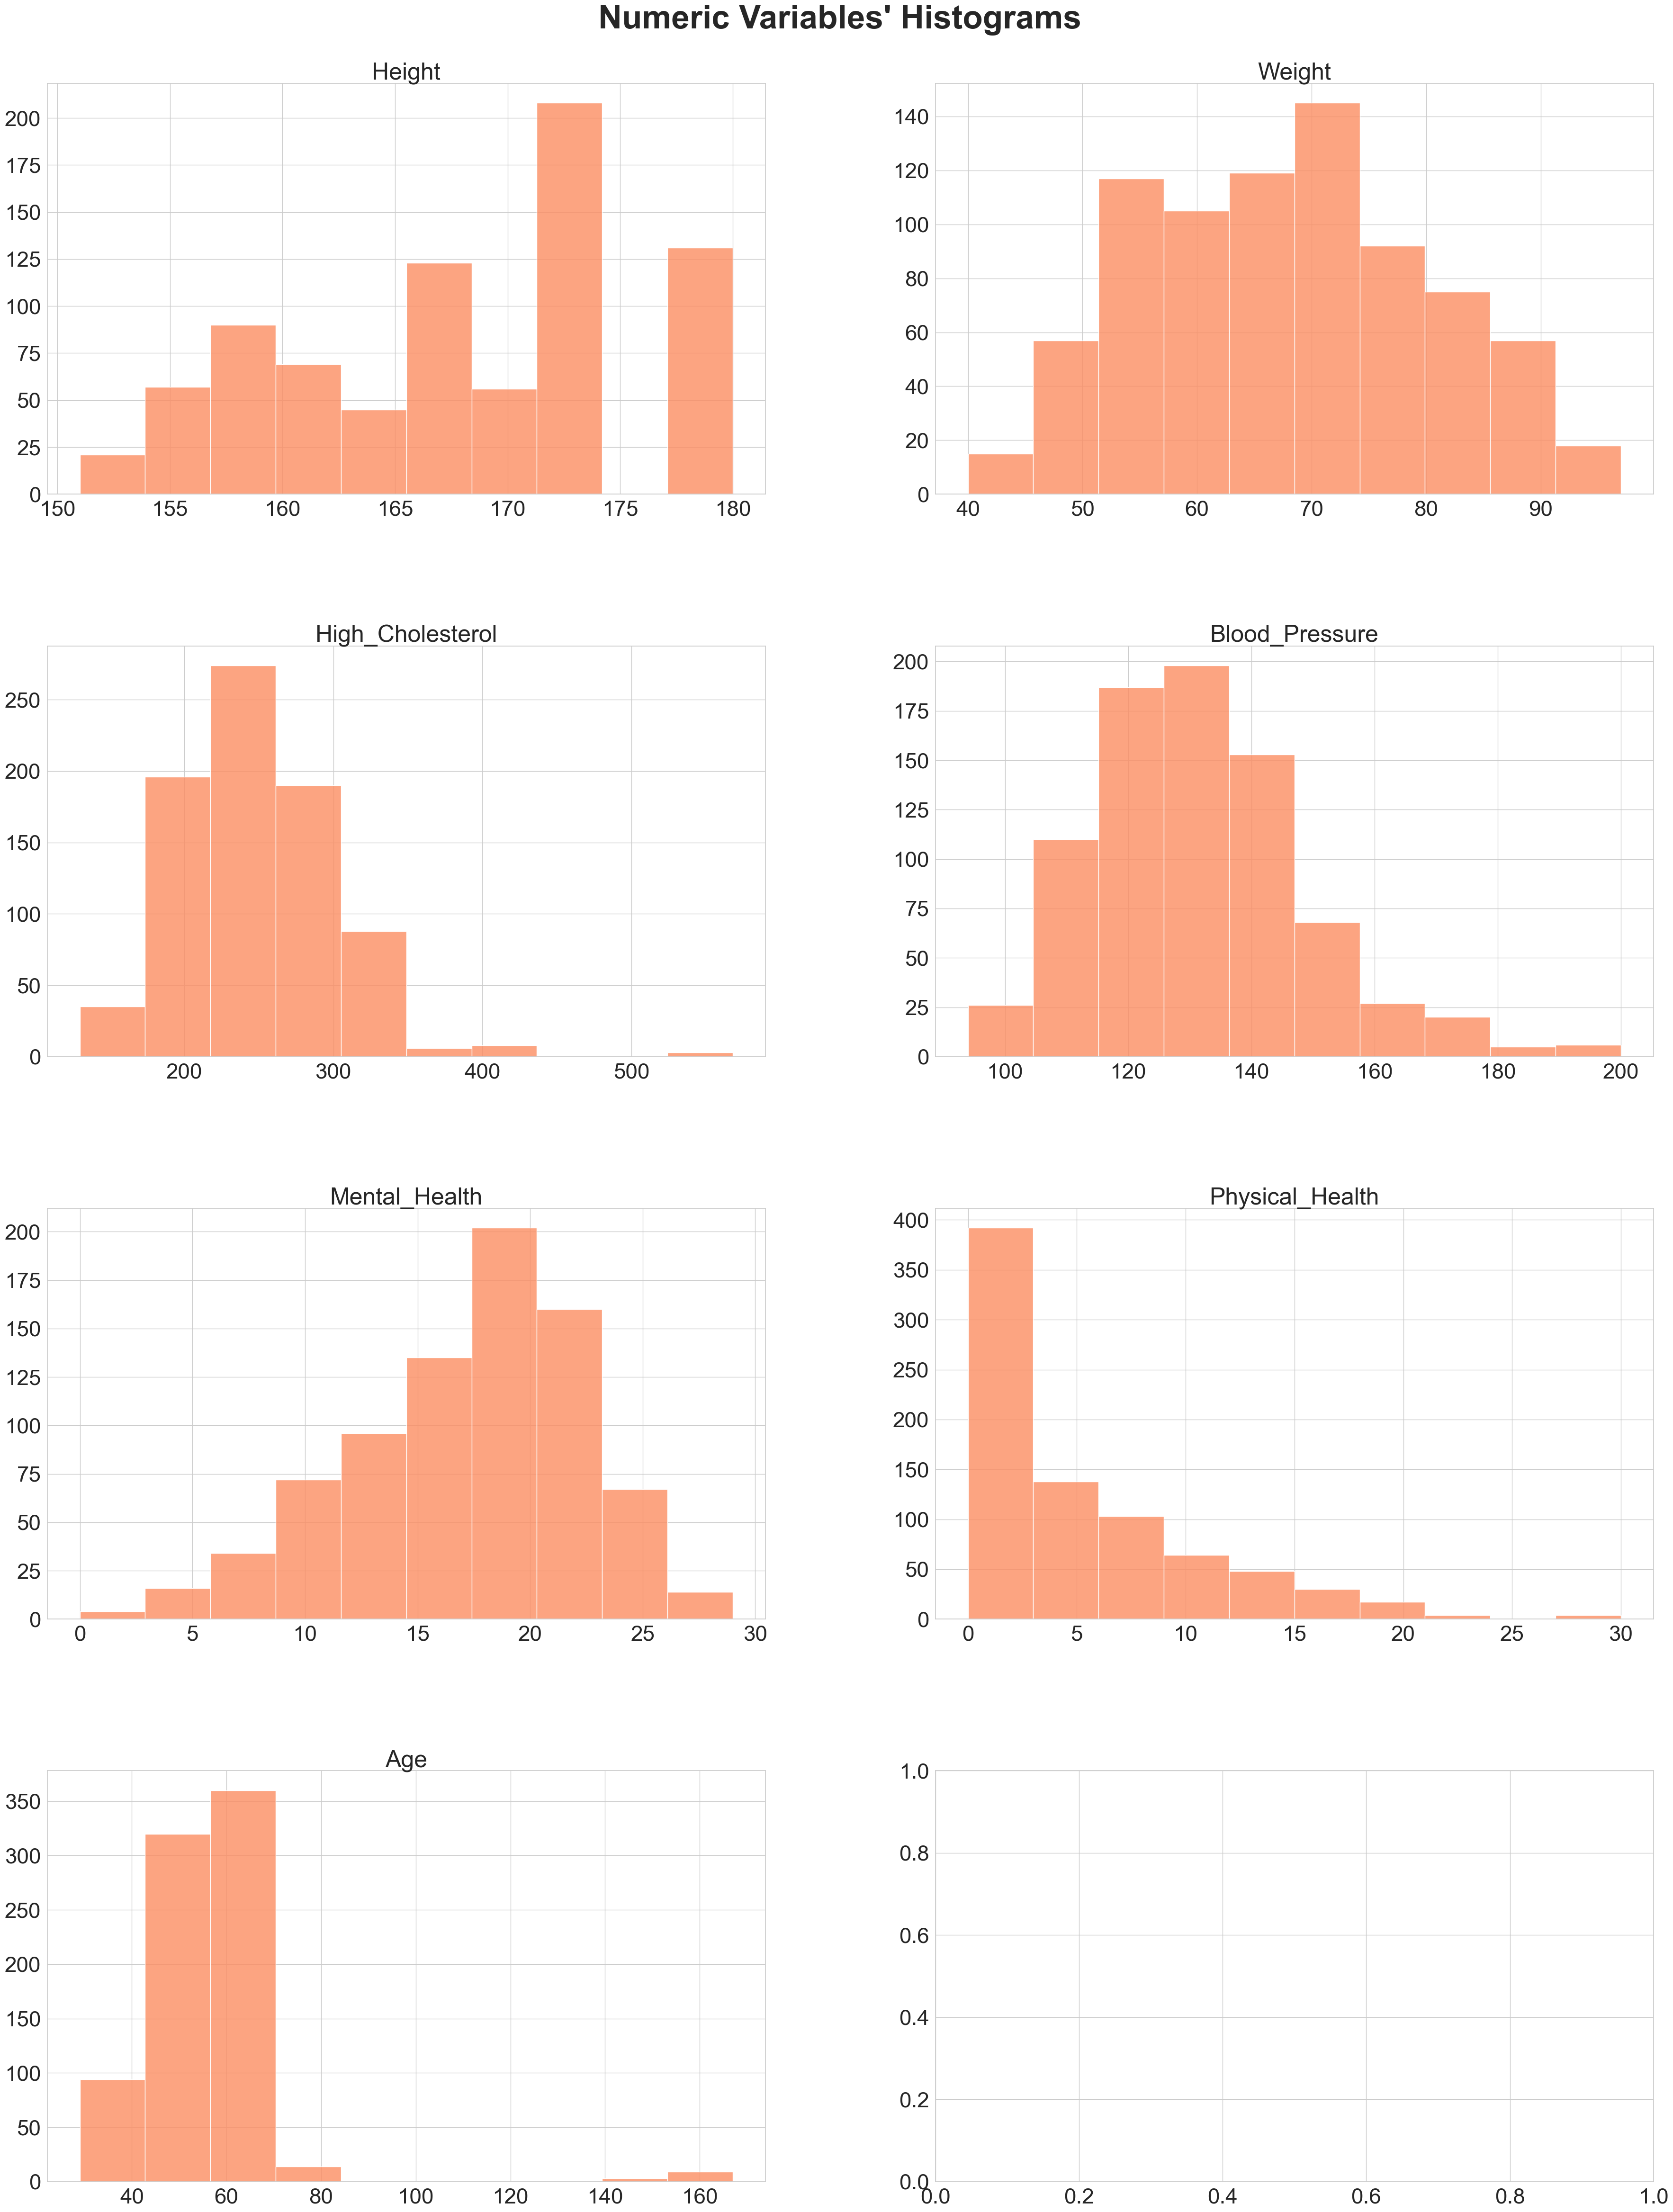

In [228]:
# All Numeric Variables' Histograms in one figure
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(list(train_patient_num.columns.values)) / 5), figsize=(40, 50))
plt.tight_layout(pad=5)

# Plot data
for ax, feat in zip(axes.flatten(),list(train_patient_num.columns.values[1:])):
    ax.hist(train_patient[feat], color=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961, .8))
    ax.set_title(feat)
       
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, fontsize=50, fontweight="bold")
plt.savefig('Figures/Numeric Variables Histograms.png', dpi=600, bbox_inches='tight')
plt.show()

In [226]:
sns.color_palette("Set2")[1]

(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)

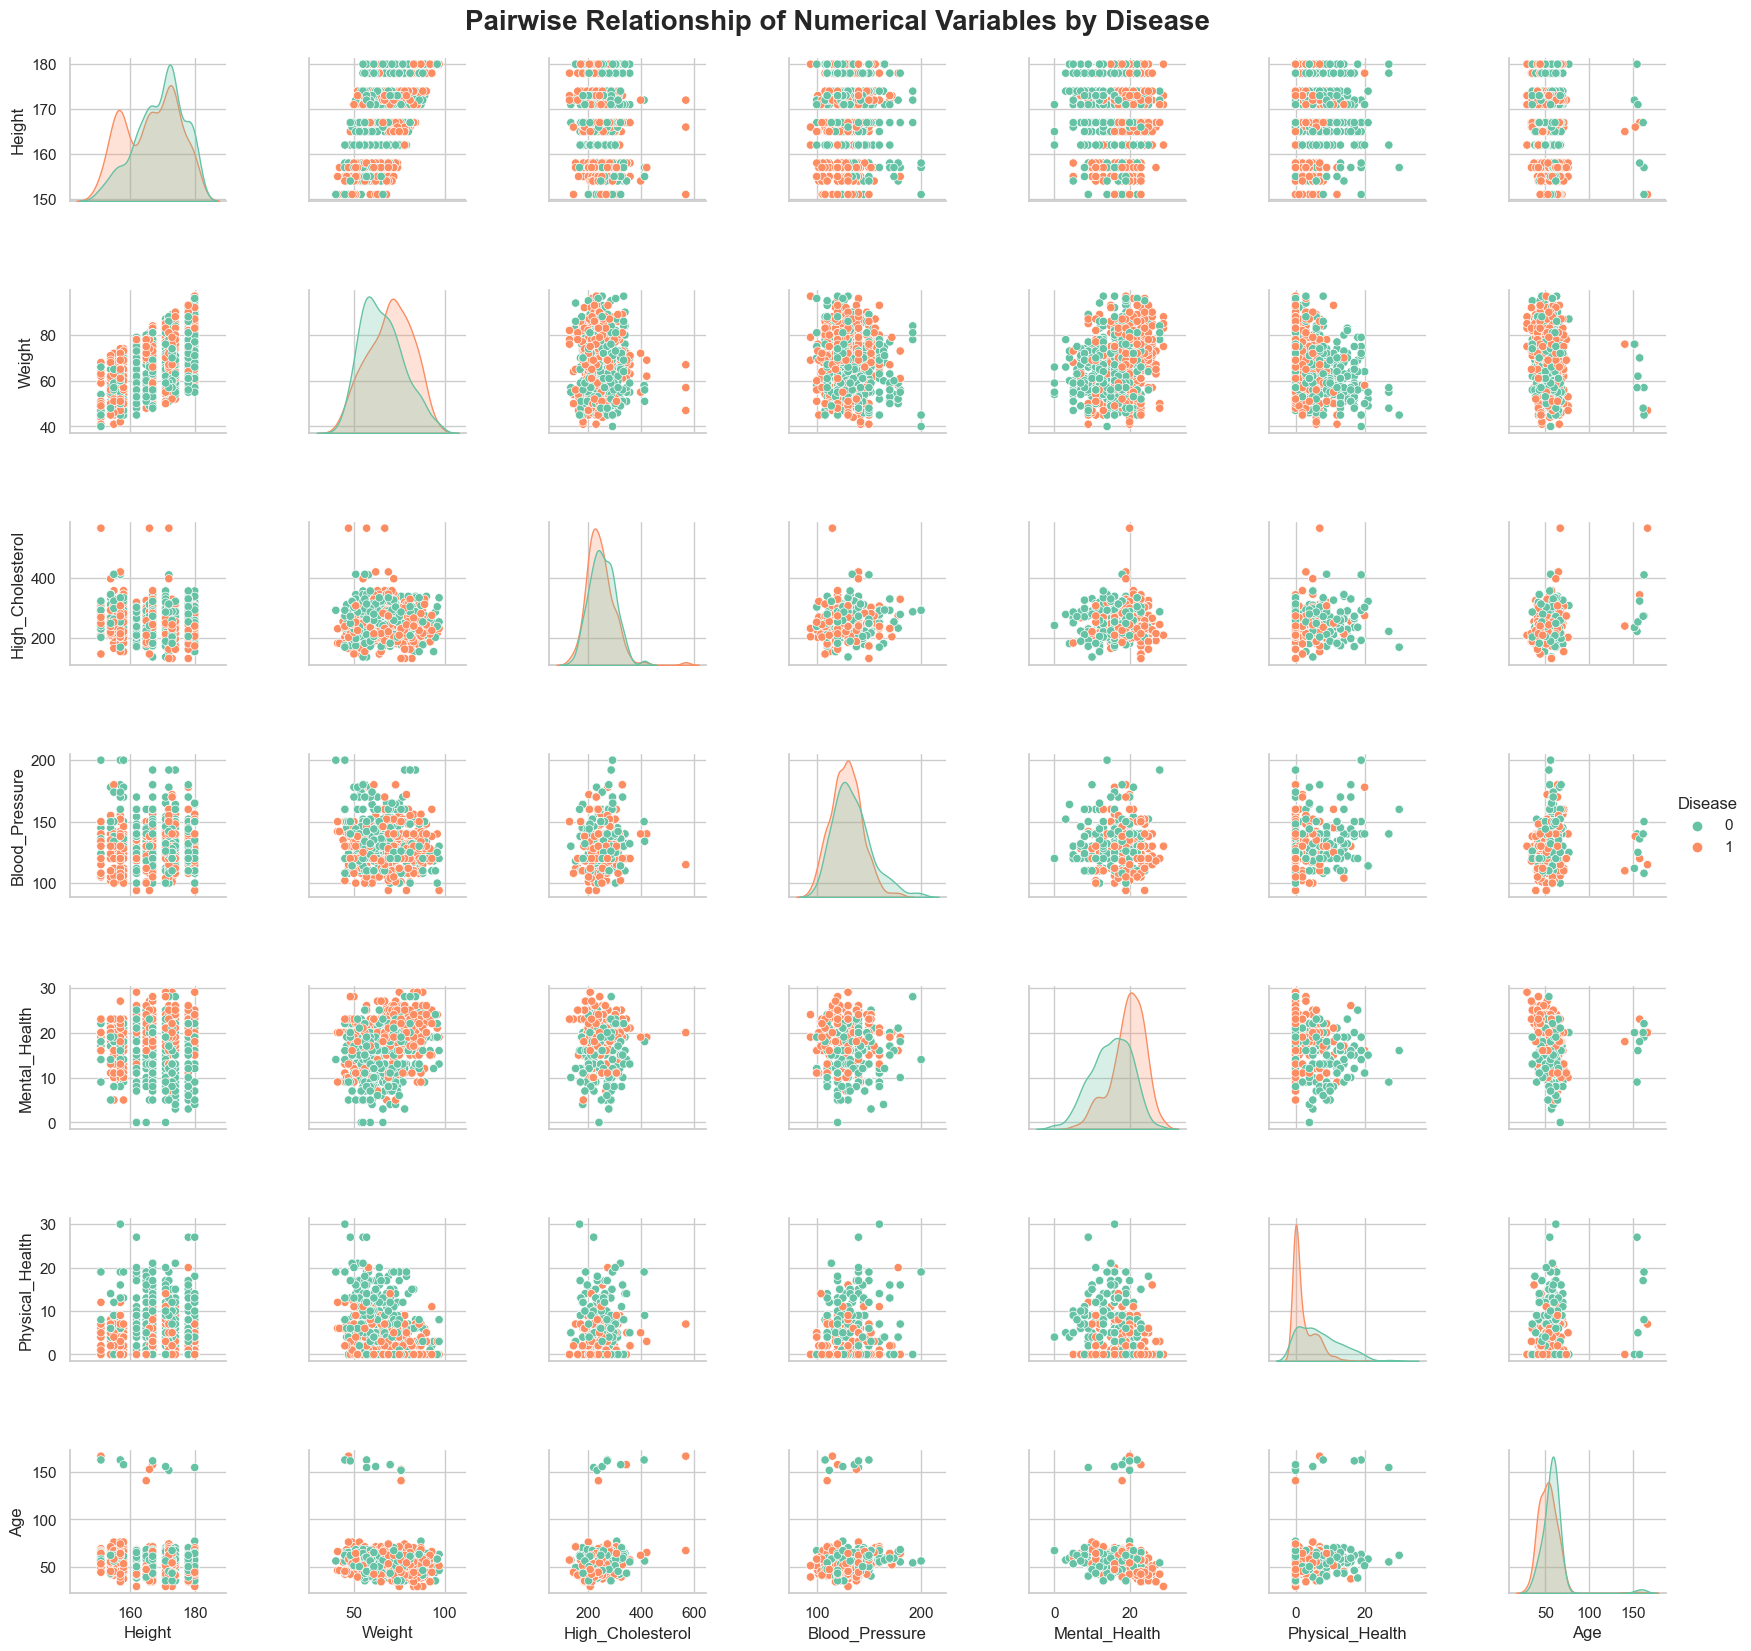

In [219]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

sns.pairplot(train_patient_num, hue="Disease", palette="Set2")

plt.tight_layout(pad=5)
title = "Pairwise Relationship of Numerical Variables by Disease"

plt.suptitle(title, fontsize=20, fontweight="bold")
plt.savefig('Figures/Pairwise Relationship of Numerical Variables by Disease.png', dpi=600, bbox_inches='tight')
plt.show()

With the help of the box plots and the histograms we were able to find outliers in:
	
* High_Cholestrol
* Age

We will now test several methods to deal with these outliers and then apply the one we find the most suiting. But first, let's drop the variable Disease from the numerical variables list (we needed it for this last plot, but now it won't be necessary).

In [ ]:
train_patient_num.drop(["Disease"],axis = 1, inplace=True)

### 2.4.1 Inter Quartile Range <a class="anchor" id="iqr"></a>

In [ ]:
iq = train_patient_num.copy()
Q1 = iq.quantile(0.25)  
Q3 = iq.quantile(0.75)
IQR = Q3 - Q1
IQR

In [ ]:
iq = iq[~((iq < (Q1 - 1.5 * IQR)) |(iq > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
iq

In [ ]:
print("The percentage of data removed with this method is ", (1-(iq.shape[0] / train_patient_num.shape[0]))*100)

### 2.4.2 Local Outlier Factor <a class="anchor" id="lof"></a>

In [ ]:
lof_df = train_patient_num.copy()

In [ ]:
# Consider 5 neighbors 
lof = LocalOutlierFactor(n_neighbors=3)

In [ ]:
lof_pred=lof.fit_predict(lof_df[train_patient_num.columns])

In [ ]:
outlier_index = lof_df[lof_pred == -1] # negative values are outliers
outlier_index

In [ ]:
print("The percentage of data removed with this method is ", round((outlier_index.shape[0] / train_patient_num.shape[0])*100,2))

In [ ]:
outlier_index.describe()

### 2.4.3 Z-Score <a class="anchor" id="z-score"></a>

In [ ]:
z_score = train_patient.copy()

In [ ]:
z = np.abs(stats.zscore(z_score[train_patient_num.columns]))

In [ ]:
z

In [ ]:
np.where(z > 3)

In [ ]:
# Remove the observations 3 standard deviations above the mean
z_score = z_score[(z < 3).all(axis=1)]

In [ ]:
print("The percentage of data removed with this method is ",(1 - (z_score.shape[0] / train_patient.shape[0]))*100)

In [ ]:
z_score.describe()

In [ ]:
train_patient = z_score.copy()

### 2.5 Encoding and Split <a class="anchor" id="encodingandsplit"></a>

Let's now look at our dataframe's columns at this point and see which ones are no longer necessary.

In [ ]:
train_patient.columns

In [ ]:
train_patient.drop(["Birth_Year","Name"],axis = 1, inplace=True)

In [ ]:
X = train_patient.drop('Disease', axis = 1)
y = train_patient['Disease']

In [ ]:
train_patient = pd.get_dummies(X, drop_first=True)

In [ ]:
train_patient

In [ ]:
train_patient.columns

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_patient, y,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 15,
                                                 stratify = y)

In [ ]:
print('Training Data')
print(y_train.value_counts()/len(y_train))
print('Validation Data')
print(y_val.value_counts()/len(y_val))

### 2.6 Scaling <a class="anchor" id="scaling"></a>

Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a Robust Scaler.

In [ ]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [ ]:
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head(3)

In [ ]:
X_val_num_scaled = scaler.transform(X_val_num) # this will return an array
# Convert the array to a pandas dataframe
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

### 2.7 Feature Selection <a class="anchor" id="featureselection"></a>

### 2.7.1 Spearman Correlation <a class="anchor" id="spearman"></a>

In [ ]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

In [ ]:
def cor_heatmap(cor):
    sns.set(font_scale=0.55)
    fig = plt.figure(figsize=(15,10))
    
    #Formatting the labels
    labels = [];
    for label in cor.columns:
        labels.append(textwrap.fill(label, width=60,
                      break_long_words=False))
        
    # Build annotation matrix (values above |0.5| will appear annotated in the plot)
    mask_annot = np.absolute(cor.values) >= 0.5
    annot = np.where(mask_annot, cor.values, np.full(cor.shape,""))
    
    # Getting the Upper Triangle of the correlation matrix
    mask = np.triu(np.ones_like(cor, dtype=bool))
    
    # Plot heatmap of the correlation matrix
    sns.heatmap(data = cor, mask = mask, annot = annot, annot_kws={"style": "italic", "weight": "bold"}, cmap = "coolwarm", yticklabels=labels,
                fmt='s', vmin=-1, vmax=1, center=0, 
                square=True, linewidths=.5)
    
    # Layout
    fig.subplots_adjust(top=0.93)
    fig.suptitle(" Spearman Correlation Matrix", fontsize=20, fontweight="bold")

    plt.savefig('Figures/Spearman Correlation.png', dpi=600, bbox_inches='tight')
    plt.show()

cor_spearman = np.round(all_train_num.corr(method ='spearman'), decimals=2)
cor_spearman

cor_heatmap(cor_spearman)

### 2.7.2 Univariate Variables <a class="anchor" id="univariate"></a>

Checking if any of the numerical variables is univariate (variance is equal to 0).

In [ ]:
X_train_num_scaled.var()

There are no univariate variables.

### 2.7.3 Logistic Regression <a class="anchor" id="logisticregressionfeature"></a>

In [ ]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=38)
embeded_lr_selector.fit(train_patient, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train_patient.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

### 2.7.4 Random Forest <a class="anchor" id="randomforest"></a>

In [ ]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=38)
embeded_rf_selector.fit(train_patient,y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train_patient.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

### 2.7.5 RFE <a class="anchor" id="rfe"></a>

In [ ]:
model = LogisticRegression()

In [ ]:
nof_list=np.arange(1,49)   
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
rfe = RFE(estimator = model, n_features_to_select = 6)

In [ ]:
X_rfe = rfe.fit_transform(train_patient, y)

In [ ]:
selected_features = pd.Series(rfe.support_, index = train_patient.columns)
selected_features

### 2.7.6 Dispersion Ratio <a class="anchor" id="dispertionratio"></a>

In [ ]:
def dispersion(data):
    data = data +1 #avoid 0 division
    aritmeticMean = np.mean(data, axis =0 )
    geometricMean = np.power(np.prod(data, axis =0 ),1/data.shape[0])
    R = aritmeticMean/geometricMean
    return R

In [ ]:
R = dispersion(train_patient)
pd.set_option('display.max_rows', None)
R.sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(60,20), dpi=200)
R.sort_values(ascending=False).plot(kind='bar')

In [ ]:
dr_bool = []
for elem in R:
    if elem >= 1:
        dr_bool.append(True)
    else:
        dr_bool.append(False)

In [ ]:
dr_features = pd.Series(dr_bool, index = train_patient.columns)

In [ ]:
dr_features

### 2.7.7 Mean Absolute Diference (MAD) <a class="anchor" id="mad"></a>

In [ ]:
mad = np.sum(np.abs(train_patient -np.mean(train_patient, axis =0 )), axis = 0)/train_patient.shape[0]
mad.sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(40,20), dpi=200)
mad.sort_values(ascending=False).plot(kind='bar')
plt.axhline(y=0.307, color='red')

In [ ]:
mad = mad.tolist()

In [ ]:
mad_bool = []
for elem in mad:
    if elem > 0.307:
        mad_bool.append(True)
    else:
        mad_bool.append(False)

In [ ]:
mad_features = pd.Series(mad_bool, index = train_patient.columns)

In [ ]:
mad_features

### 2.7.8 Feature Selection Results <a class="anchor" id="results"></a>

In [ ]:
feature_selection_df = pd.DataFrame({'Feature':train_patient.columns,
                                     'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support,
                                     'RFE':selected_features, 
                                     'MAD': mad_features,
                                     'DR' : dr_features})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(train_patient))

In [ ]:
X_train = X_train_num_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [ ]:
X_train.head()

In [ ]:
X_val = X_val_num_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [ ]:
X_val.head()

## 3. Modelling <a class="anchor" id="modelling"></a>

###  3.1 Logistic Regression <a class="anchor" id="logistic"></a>

In [ ]:
parameters_LogisticRegression = [
    {'C': np.logspace(-3,3,7),
     "penalty":["l1","l2"],
     "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
    }
    
]
model_LogisticRegression = GridSearchCV(LogisticRegression(), parameters_LogisticRegression, cv=10, scoring='f1')
model_LogisticRegression.fit(X_train, y_train)

print(model_LogisticRegression.best_params_)

In [ ]:
y_pred = model_LogisticRegression.predict(X_val)
y_pred

In [ ]:
pred_prob = model_LogisticRegression.predict_proba(X_val)
pred_prob

In [ ]:
labels_train = model_LogisticRegression.predict(X_train)
labels_val = model_LogisticRegression.predict(X_val)

In [ ]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
# confusion matrix 
sns.set(font_scale=2)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_LogisticRegression_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_LogisticRegression_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_LogisticRegression_confusionMatrix .flatten()/np.sum(model_LogisticRegression_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(model_LogisticRegression_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

###  3.2 Gaussian Naive Bayes <a class="anchor" id="gaussiannb"></a>

In [ ]:
parameters_GaussianNB = [
    {"var_smoothing":[0.0001,0.001,0.01,0.1]
    }
    
]
model_GaussianNB = GridSearchCV(GaussianNB(), parameters_GaussianNB, cv=10, scoring='f1')
model_GaussianNB.fit(X_train, y_train)

print(model_GaussianNB.best_params_)

In [ ]:
labels_train = model_GaussianNB.predict(X_train)
labels_val = model_GaussianNB.predict(X_val)

In [ ]:
model_GaussianNB.predict_proba(X_val)

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_GaussianNB_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_GaussianNB_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_GaussianNB_confusionMatrix .flatten()/np.sum(model_GaussianNB_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Gaussian Naive Bays")
sns.heatmap(model_GaussianNB_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

###  3.3 KNN <a class="anchor" id="knn"></a>

In [ ]:
numberK_list=np.arange(2,90)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

In [ ]:
parameters_KNN = [
    {'n_neighbors': [3, 4, 5, 6, 7, 8],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'metric': ['minkowski', 'manhattan'],
     'weights': ['uniform', 'distance']
    }
    
]
model_KNN = GridSearchCV(KNeighborsClassifier(), parameters_KNN, cv=10, scoring='f1')
model_KNN.fit(X_train, y_train)

print(model_KNN.best_params_)

In [ ]:
labels_train = model_KNN.predict(X_train)
labels_val = model_KNN.predict(X_val)

In [ ]:
model_KNN.predict_proba(X_val)

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_KNN_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_KNN_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_KNN_confusionMatrix .flatten()/np.sum(model_KNN_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for KNN")
sns.heatmap(model_KNN_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

### 3.4 Decision Trees <a class="anchor" id="dt"></a>

In [ ]:
parameters_DT = [
    {'max_depth': [2, 3, 5, 8, 10, 20],
     'max_leaf_nodes': [10, 20, 30, 40, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
    }
]   

In [ ]:
model_DT = GridSearchCV(DecisionTreeClassifier(), parameters_DT, cv=10, scoring='f1')
model_DT.fit(X_train, y_train)
final_DT = model_DT.best_estimator_

print(model_DT.best_params_)

In [ ]:
dot_data = tree.export_graphviz(final_DT, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=["Lower Average", "Above Average"],  # only to classification problems
                     filled=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"25,25!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [ ]:
print('The defined three has a depth of ' + str(final_DT.get_depth()) + ', ' + str(final_DT.tree_.node_count) + 
      ' nodes and a total of ' + str(final_DT.get_n_leaves()) + ' leaves.')

In [ ]:
labels_train = model_KNN.predict(X_train)
labels_val = model_KNN.predict(X_val)

In [ ]:
model_DT.predict_proba(X_val)

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_DT_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_DT_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_DT_confusionMatrix .flatten()/np.sum(model_DT_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Decision Trees")
sns.heatmap(model_DT_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

In [ ]:
final_DT.feature_importances_

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances(final_DT)

### 3.5 Support Vector Machine <a class="anchor" id="supportvectormachine"></a>

#### 3.5.1 Support Vector Classification  <a class="anchor" id="svc"></a>

In [ ]:
parameters_SVC = [
    {'C': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','sigmoid'],
    'random_state':[None,1,10,20,30,40]
    },
    
]
model_SVC= GridSearchCV(SVC(), parameters_SVC,cv=10,scoring ='f1')
model_SVC.fit(X_train, y_train)
print(model_SVC.best_params_)


In [ ]:
labels_train = model_SVC.predict(X_train)
labels_val = model_SVC.predict(X_val)

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_SVC_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_SVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_SVC_confusionMatrix .flatten()/np.sum(model_SVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Support Vector Classification")
sns.heatmap(model_SVC_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

#### 3.5.2 Nu-Support Vector Classification <a class="anchor" id="nusvc"></a>

In [ ]:
parameters_NuSVC = [
    {'nu': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf','sigmoid'],
    'random_state':[None,1,10,20,30,40]
    },
    
]

model_NuSVC= GridSearchCV(NuSVC(), parameters_NuSVC,cv=10,scoring ='f1')
model_NuSVC.fit(X_train, y_train)
print(model_NuSVC.best_params_)


In [ ]:
labels_train = model_NuSVC.predict(X_train)
labels_val = model_NuSVC.predict(X_val)

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_NuSVC_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_NuSVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_NuSVC_confusionMatrix .flatten()/np.sum(model_NuSVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Nu-Support Vector Classification")
sns.heatmap(model_NuSVC_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

#### 3.5.3 Linear Support Vector Classification <a class="anchor" id="linearsvc"></a>

In [ ]:
parameters_LinearSVC = [
    {'C': [0.5,1,10,100],
     'dual': [True,False],
    'random_state':[None,1,10,20,30,40]
    },
    
]
model_LinearSVC= GridSearchCV(LinearSVC(), parameters_LinearSVC,cv=10,scoring ='f1')
model_LinearSVC.fit(X_train, y_train)
print(model_LinearSVC.best_params_)

In [ ]:
labels_train = model_LinearSVC.predict(X_train)
labels_val = model_LinearSVC.predict(X_val)

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_LinearSVC_confusionMatrix = confusion_matrix(y_val, y_pred)
test_counts = ["{0:0.0f}".format(value) for value in model_LinearSVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_LinearSVC_confusionMatrix .flatten()/np.sum(model_LinearSVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Linear Support Vector Classification")
sns.heatmap(model_LinearSVC_confusionMatrix, annot=test_labels, fmt='', cmap='Blues');

### 3.6 Neural Networks <a class="anchor" id="nn"></a>

In [ ]:
def avg_score(model):
    score_train = []
    score_val = []
    timer = []
    f1_score_val = []
    f1_score_train = []
    
    for i in range(10):
        begin = time.perf_counter() # start counting time
        model.fit(X_train, y_train) # fit your model to your training data
        end = time.perf_counter() # stop counting time
        
        value_train = model.score(X_train, y_train) # mean accuracy for train
        value_val = model.score(X_val, y_val) # mean accuracy for validation
        score_train.append(value_train) # append the mean accuracy in train to your list score_train
        score_val.append(value_val) # append the mean accuracy in validation to your list score_val
        timer.append(end-begin) # append the time to your list timer
        f1_score_val.append(f1_score(model.predict(X_val), y_val))
        f1_score_train.append(f1_score(model.predict(X_train), y_train))
        
    
    avg_time = round(np.mean(timer),3) # check the mean value of training time for your 10 models 
    avg_train = round(np.mean(score_train),3) # check the mean accuracy in train for your 10 models
    avg_val = round(np.mean(score_val),3) # check the mean accuracy in validation for your 10 models
    std_time = round(np.std(timer),2) # check the standard deviation of training time for your 10 models
    std_train = round(np.std(score_train),2) # check the standard deviation of the mean accuracy in train for your 10 models
    std_val = round(np.std(score_val),2) # check the standard deviation of the mean accuracy in validation for your 10 models
    avg_f1_val = round(np.mean(f1_score_val),3)
    avg_f1_train = round(np.mean(f1_score_train),3)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_f1_train), str(avg_f1_val)

def show_results(df, models):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for model in models:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_f1_train, avg_f1_val = avg_score(model)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_f1_train, avg_f1_val
        count+=1
    return df

In [ ]:
model_simple = MLPClassifier(hidden_layer_sizes=(5))
model_medium = MLPClassifier(hidden_layer_sizes=(20,20))
model_complex = MLPClassifier(hidden_layer_sizes=(40, 40, 40))

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['Simple','Medium','Complex'])
show_results(df, [model_simple, model_medium, model_complex])

In [ ]:
model_logistic = MLPClassifier(activation='logistic')
model_tanh = MLPClassifier(activation='tanh')
model_relu = MLPClassifier(activation='relu')
model_identity = MLPClassifier(activation='identity')

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['logistic','tanh', 'relu', 'identity'])
show_results(df, [model_logistic, model_tanh, model_relu, model_identity])

In [ ]:
model_sgd = MLPClassifier(solver = 'sgd')
model_adam = MLPClassifier(solver = 'adam')
model_lbfgs = MLPClassifier(solver = 'lbfgs')

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['sgd','adam', 'lbfgs'])
show_results(df, [model_sgd, model_adam, model_lbfgs])

In [ ]:
model_constant = MLPClassifier(solver = 'sgd', learning_rate = 'constant')
model_invscaling = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling')

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['constant','invscaling'])
show_results(df, [model_constant, model_invscaling])

In [ ]:
parameters_NN = {
    'hidden_layer_sizes': [(200,80,60),(200,80,60,40),(200,80,60,40,20)],
    'activation': ['relu','tanh','logistic','identity'],
    'solver': ['lbfgs'],
}

In [ ]:
model_NN = RandomizedSearchCV(MLPClassifier(), parameters_NN, cv=10)
model_NN.fit(X_train, y_train)

final_model_NN = model_NN.best_estimator_
print(model_NN.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['final_model_NN'])
show_results(df, [final_model_NN])

### 3.7 Ensemble Models <a class="anchor" id="ensemble"></a>

Ensemble learning is a machine learning technique that seeks better predictive performance by combining the predictions from multiple models.

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

The function return_f1score will allow us to obtain the f1 score for all the models we are going to create on the notebook, and each model instance is going to be trained for 30 (10*3) times, using the RepeatedStratifiedKFold.

In [ ]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

The function return_results will receive as parameters all the models instances and is going to return the f1 scores from the previous function, and make a boxplot of the results for all the model instances.

In [ ]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train, y_train)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(18,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=10)
    plt.show()

#### 3.7.1 Bagging Classifier <a class="anchor" id="bagging"></a>

In [ ]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()


def get_models(*args):
    models = dict()
    for arg in args:
        models[str(arg) + '_bagging'] = BaggingClassifier(base_estimator = arg, random_state = 15)      
        models[str(arg)] = arg  
    return models

models = get_models(dt, knn, lr)
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(max_samples = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
return_results(models)

In [ ]:
parameters_Bagging = {
    'base_estimator': [DecisionTreeClassifier()],
    'n_estimators': [2,5,10,20,30,50,100,150,200],
    'max_samples': [0.9, 1],
    'max_features': [0.6,0.8,1.0],
    'bootstrap': [False]
}

In [ ]:
model_Bagging = GridSearchCV(BaggingClassifier(), parameters_Bagging)
model_Bagging.fit(X_train, y_train)

final_model_Bagging = model_Bagging.best_estimator_
print(model_Bagging.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['final_model_Bagging'])
show_results(df, [final_model_Bagging])

#### 3.7.2 Random Forest <a class="anchor" id="rforest"></a>

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 10)      
    return models

models = get_models([10,20,50,100,200,300])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

In [ ]:
model_gini = RandomForestClassifier(criterion='gini')
model_entropy= RandomForestClassifier(criterion='entropy')

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['gini','entropy'])
show_results(df, [model_gini, model_entropy])

In [ ]:
model_small_maxdepth = RandomForestClassifier(max_depth=5)
model_medium_maxdepth = RandomForestClassifier(max_depth=10)
model_big_maxdepth = RandomForestClassifier(max_depth=15)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['small','medium', 'big'])
show_results(df, [model_small_maxdepth, model_medium_maxdepth, model_big_maxdepth])

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 15)      
    return models

models = get_models([1,2,4,6,8,10,None])
return_results(models)

In [ ]:
model_small_min_samples_leaf = RandomForestClassifier(min_samples_leaf=3)
model_medium_min_samples_leaf = RandomForestClassifier(min_samples_leaf=5)
model_big_min_samples_leaf = RandomForestClassifier(min_samples_leaf=8)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['small','medium', 'big'])
show_results(df, [model_small_min_samples_leaf, model_medium_min_samples_leaf, model_big_min_samples_leaf])

In [ ]:
parameters_random_forest = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'class_weight': ['balanced_subsample'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [False]
}

In [ ]:
model_random_forest = GridSearchCV(RandomForestClassifier(), parameters_random_forest,scoring ='f1')
model_random_forest.fit(X_train, y_train)

final_model_forest = model_random_forest.best_estimator_
print(model_random_forest.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['final_model_forest'])
show_results(df, [final_model_forest])

Checking feature importance once again to make sure our feature selection is good.

In [ ]:
importances = final_model_forest.feature_importances_
pd.Series(importances, index = X_train.columns).sort_values(ascending = False)

#### 3.7.3 Extra Trees <a class="anchor" id="et"></a>

In [ ]:
parameters_ExtraTrees = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'class_weight': ['balanced_subsample'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

In [ ]:
model_ExtraTrees = GridSearchCV(ExtraTreesClassifier(), parameters_ExtraTrees, cv=10, scoring ='f1')

model_ExtraTrees.fit(X_train, y_train)
final_model_ExtraTrees = model_ExtraTrees.best_estimator_
print(model_ExtraTrees.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Extra_Trees'])
show_results(df, [final_model_ExtraTrees])

#### 3.7.4 AdaBoost <a class="anchor" id="ada"></a>

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=value), random_state = 15)      
    return models

models = get_models([1,2,3,4,5,6, 7, 8, 9, 10])
return_results(models)

In [ ]:
def get_models():
    models = dict()
    models['ad_LR'] = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=500), random_state = 15) 
    models['ad_def'] = AdaBoostClassifier(random_state = 15)  
    return models

models = get_models()
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

In [ ]:
parametes_adaBoost = {
              "base_estimator" : [DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=6),DecisionTreeClassifier(max_depth=7)],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[30,50,80,100],
              "learning_rate":  [0.8, 1,1.5]
}

In [ ]:
model_adaBoost = GridSearchCV(AdaBoostClassifier(), parametes_adaBoost, cv=10, scoring='f1')

model_adaBoost.fit(X_train, y_train)
final_model_adaBoost = model_adaBoost.best_estimator_
print(model_adaBoost.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Ada Boost'])
show_results(df, [final_model_adaBoost])

#### 3.7.5 Gradient Boosting <a class="anchor" id="gradient"></a>

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([100, 200, 300])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,1.0])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 15)      
    return models

models = get_models([2,0.5,'sqrt','log2',None])
return_results(models)

In [ ]:
parameters_GradientBoosting = {
    'n_estimators': [300],
    'learning_rate': [0.3, 0.5],
    'subsample': [0.6, 1],
    'max_features': [None]
}

In [ ]:
model_GradientBoosting = GridSearchCV(GradientBoostingClassifier(), parameters_GradientBoosting, cv=10)

model_GradientBoosting.fit(X_train, y_train)
final_model_GradientBoosting = model_GradientBoosting.best_estimator_

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Gradient_Boosting'])
show_results(df, [final_model_GradientBoosting])

## 4. Assessment <a class="anchor" id="assessment"></a>

In [ ]:
classifiers = []

classifiers.append(model_LogisticRegression)
classifiers.append(model_GaussianNB)
classifiers.append(model_KNN)
classifiers.append(model_DT)
classifiers.append(model_SVC)
classifiers.append(final_model_NN)
classifiers.append(final_model_Bagging)
classifiers.append(final_model_forest)
classifiers.append(final_model_ExtraTrees)
classifiers.append(final_model_adaBoost)
classifiers.append(final_model_GradientBoosting)


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = 10, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression", "GaussianNB", "KNN", "Decision Tree", "SVC", "Neural Networks", "Bagging", "Random Forest", "Extra Trees", "AdaBoost", "Gradient Boosting"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## 5. Deployment <a class="anchor" id="deployment"></a>

In [ ]:
test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')

In [ ]:
test_demo.head()

In [ ]:
test_habits.head()

In [ ]:
test_health.head()

Merging all the datasets into a unique one based on the PatientID variable.

In [ ]:
test_patient_original = pd.merge(pd.merge(test_demo, test_health, on="PatientID"), test_habits, on='PatientID')

In [ ]:
test_patient_original

In [ ]:
test_patient_original.info()

In [ ]:
test_patient = test_patient_original.copy()

### 5.1 Repeating all the preprocessing steps for the test data <a class="anchor" id="rep"></a>

In [ ]:
test_patient.duplicated().value_counts()

In [ ]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = test_patient.replace(undesireable_char,np.nan, inplace=True)

In [ ]:
print(a)

In [ ]:
test_patient.set_index('PatientID', inplace = True)

Looking for null values in the dataframe. We concluded that Education contains 13 null values.

In [ ]:
test_patient.isna().sum()

In [ ]:
test_patient.replace(to_replace="LONDON", value="London", inplace=True, limit=None)

Creating a gender variable based on the prefix in the Name.

In [ ]:
#Create variable Gender
gender = []

for elem in test_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

test_patient['Gender'] = gender

print(test_patient['Gender'])

Converting the Birth Year to Age by subtracting it to the current Year.

In [ ]:
test_patient['Age'] = datetime.now().year - test_patient['Birth_Year'] 
print(test_patient['Age'])

Creating a variable of Body Mass Index using the Weight and Height variables.

In [ ]:
#Create variable BMI     
test_patient['BMI'] = (test_patient['Weight']/(test_patient['Height']**2)*10000).round(2)

print(test_patient['BMI'])

In [ ]:
test_patient = test_patient.drop(["Birth_Year", "Name"],axis = 1)

In [ ]:
test_patient = pd.get_dummies(test_patient, drop_first=True)

In [ ]:
test_patient

In [ ]:
X_test_num = test_patient.select_dtypes(include=np.number).set_index(test_patient.index)
X_test_cat = test_patient.select_dtypes(exclude=np.number).set_index(test_patient.index)

In [ ]:
X_test_num_scaled = scaler.transform(X_test_num)

test_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns)
test_scaled.head(3)

In [ ]:
X_test = test_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [ ]:
X_test

In [ ]:
final_model = final_model_forest.predict(X_test)
final_model

In [ ]:
answer = pd.DataFrame([test_patient.index.T, final_model]).T
answer.columns = ['PatientID','Disease']
answer

In [ ]:
answer["PatientID"]=answer["PatientID"].astype(int)
answer["Disease"]=answer["Disease"].astype(int)

In [ ]:
answer.head(20)

In [ ]:
answer.to_csv('answ_log_1.csv', index = None)